# Descriptive Analysis of the Drawings data

- This notebook makes elementary analysis and plots of the metadata of the drawings

In [1]:
import os
import glob
import zipfile
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pycountry import countries
import seaborn as sns
from tqdm import tqdm
import plotly.express as px

In [2]:
# The relative location to the folder with drawings
drawings_folder = "./../../../../From_UNESCO/Drawings_Data/"

The drawings are stored in 6 folders named `Train_01.zip` to `Train_06.zip`. Each of the zip folders contains a folder with the name being a year and they contain drawings from that year. However, on several occasions, the drawings are present in a different year folder. 

For the majority of the drawings, the naming contains 6 parts. The 6 parts are mainly the year, age group of the artist, Unique id, Country of origin for the drawings, Side of the drawings, and the quality of the image.

An example file name is `2015_14-17_3372_ITA_V_A.jpg`.
- The first part (2015) is the year of the competition.
- The second part (14-17) is the age category of the artist.
- The third part (3371) is the id for the drawing. Should check if this is unique per year or per country.
- The fourth part (ITA) is the name of the country the drawings come from.
- The fifth part (can be R or V) indicates the Recto or Verso of the drawing. The Recto part has the drawing. The Verso part has the metadata.
- The last part (can be A or C) is whether the image is saved for archival purposes or consultation purposes.

In some cases, some of these components are missing. Below is a python dictionary that contains the mistaken file name as the key and the updated file name as the value.

In [ ]:
updated_filenames = {"TRAIN_01/1995/1995_14-17_64_0072.jpg" : "TRAIN_01/1995/1995_14-17_64_0072_R_C.jpg",
"TRAIN_01/1995/1995_14-17_64_0073.jpg" : "TRAIN_01/1995/1995_14-17_64_0073_V_C.jpg",
"TRAIN_01/1995/1995_14-17_64_0080.jpg" : "TRAIN_01/1995/1995_14-17_64_0080_R_C.jpg",
"TRAIN_01/1995/1995_14-17_64_0081.jpg" : "TRAIN_01/1995/1995_14-17_64_0081_V_C.jpg",
"TRAIN_01/1995/1995_14-17_64_0084.jpg" : "TRAIN_01/1995/1995_14-17_64_0084_R_C.jpg",
"TRAIN_01/1995/1995_14-17_64_0085.jpg" : "TRAIN_01/1995/1995_14-17_64_0085_V_C.jpg",
"TRAIN_01/1995/1995_14-17_64_0088.jpg" : "TRAIN_01/1995/1995_14-17_64_0088_R_C.jpg",
"TRAIN_01/1995/1995_14-17_64_0089.jpg" : "TRAIN_01/1995/1995_14-17_64_0089_V_C.jpg",
"TRAIN_01/1995/1995_14-17_64_0092.jpg" : "TRAIN_01/1995/1995_14-17_64_0092_R_C.jpg",
"TRAIN_01/1995/1995_14-17_64_0093.jpg" : "TRAIN_01/1995/1995_14-17_64_0093_V_C.jpg",
"TRAIN_01/1995/1995_14-17_64_0094.jpg" : "TRAIN_01/1995/1995_14-17_64_0094_R_C.jpg",
"TRAIN_01/1995/1995_14-17_64_0095.jpg" : "TRAIN_01/1995/1995_14-17_64_0095_V_C.jpg",
"TRAIN_01/1995/1995_14-17_64_0096.jpg" : "TRAIN_01/1995/1995_14-17_64_0096_R_C.jpg",
"TRAIN_01/1995/1995_14-17_64_0097.jpg" : "TRAIN_01/1995/1995_14-17_64_0097_V_C.jpg",
"TRAIN_01/1995/1995_14-17_64_0098.jpg" : "TRAIN_01/1995/1995_14-17_64_0098_R_C.jpg",
"TRAIN_01/1995/1995_14-17_64_0099.jpg" : "TRAIN_01/1995/1995_14-17_64_0099_V_C.jpg",
"TRAIN_01/1995/1995_14-17_64_0100.jpg" : "TRAIN_01/1995/1995_14-17_64_0100_R_C.jpg",
"TRAIN_01/1995/1995_14-17_64_0101.jpg" : "TRAIN_01/1995/1995_14-17_64_0101_V_C.jpg",
"TRAIN_01/1996/1996_10-13_21_0016_Z.jpg" : "TRAIN_01/1996/1996_10-13_21_0016_Z_V_C.jpg",
"TRAIN_01/1996/1996_10-13_21_0017_Z.jpg" : "TRAIN_01/1996/1996_10-13_21_0017_Z_V_C.jpg",
"TRAIN_01/1996/1996_10-13_25_0043.jpg" : "TRAIN_01/1996/1996_10-13_25_0043_R_C.jpg",
"TRAIN_01/1996/1996_10-13_25_0045.jpg" : "TRAIN_01/1996/1996_10-13_25_0045_V_C.jpg",
"TRAIN_01/1996/1996_10-13_26_0015.jpg" : "TRAIN_01/1996/1996_10-13_26_0015_R_C.jpg",
"TRAIN_01/1998/1998_10-13_43_0004.jpg" : "TRAIN_01/1998/1998_10-13_43_0004_R_C.jpg",
"TRAIN_01/1998/1998_10-13_43_0004a.jpg" : "TRAIN_01/1998/1998_10-13_43_0004a_V_C.jpg",
"TRAIN_01/1998/1998_14-17_26_0013.jpg" : "TRAIN_01/1998/1998_14-17_26_0013_R_C.jpg",
"TRAIN_01/1998/1998_14-17_26_0014.jpg" : "TRAIN_01/1998/1998_14-17_26_0014_V_C.jpg",
"TRAIN_01/1998/1998_14-17_26_0015.jpg" : "TRAIN_01/1998/1998_14-17_26_0015_R_C.jpg",
"TRAIN_01/1998/1998_14-17_26_0016.jpg" : "TRAIN_01/1998/1998_14-17_26_0016_V_C.jpg",
"TRAIN_01/1998/1998_18-25_3_0035 .jpg" : "TRAIN_01/1998/1998_18-25_3_0035_R_C.jpg",
"TRAIN_01/1998/1998_18-25_3_0036 .jpg" : "TRAIN_01/1998/1998_18-25_3_0036_V_C.jpg",
"TRAIN_01/1998/1998_18-25_3_0038 .jpg" : "TRAIN_01/1998/1998_18-25_3_0038_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0000.jpg" : "TRAIN_01/1998/1998_18-25_5_0000_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0001.jpg" : "TRAIN_01/1998/1998_18-25_5_0001_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0002.jpg" : "TRAIN_01/1998/1998_18-25_5_0002_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0003.jpg" : "TRAIN_01/1998/1998_18-25_5_0003_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0004.jpg" : "TRAIN_01/1998/1998_18-25_5_0004_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0005.jpg" : "TRAIN_01/1998/1998_18-25_5_0005_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0006.jpg" : "TRAIN_01/1998/1998_18-25_5_0006_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0007.jpg" : "TRAIN_01/1998/1998_18-25_5_0007_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0008.jpg" : "TRAIN_01/1998/1998_18-25_5_0008_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0009.jpg" : "TRAIN_01/1998/1998_18-25_5_0009_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0010.jpg" : "TRAIN_01/1998/1998_18-25_5_0010_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0011.jpg" : "TRAIN_01/1998/1998_18-25_5_0011_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0012.jpg" : "TRAIN_01/1998/1998_18-25_5_0012_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0013.jpg" : "TRAIN_01/1998/1998_18-25_5_0013_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0014.jpg" : "TRAIN_01/1998/1998_18-25_5_0014_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0015.jpg" : "TRAIN_01/1998/1998_18-25_5_0015_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0016.jpg" : "TRAIN_01/1998/1998_18-25_5_0016_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0017.jpg" : "TRAIN_01/1998/1998_18-25_5_0017_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0018.jpg" : "TRAIN_01/1998/1998_18-25_5_0018_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0019.jpg" : "TRAIN_01/1998/1998_18-25_5_0019_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0020.jpg" : "TRAIN_01/1998/1998_18-25_5_0020_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0021.jpg" : "TRAIN_01/1998/1998_18-25_5_0021_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0022.jpg" : "TRAIN_01/1998/1998_18-25_5_0022_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0023.jpg" : "TRAIN_01/1998/1998_18-25_5_0023_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0024.jpg" : "TRAIN_01/1998/1998_18-25_5_0024_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0025.jpg" : "TRAIN_01/1998/1998_18-25_5_0025_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0026.jpg" : "TRAIN_01/1998/1998_18-25_5_0026_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0027.jpg" : "TRAIN_01/1998/1998_18-25_5_0027_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0028.jpg" : "TRAIN_01/1998/1998_18-25_5_0028_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0029.jpg" : "TRAIN_01/1998/1998_18-25_5_0029_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0030.jpg" : "TRAIN_01/1998/1998_18-25_5_0030_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0031.jpg" : "TRAIN_01/1998/1998_18-25_5_0031_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0032.jpg" : "TRAIN_01/1998/1998_18-25_5_0032_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0033.jpg" : "TRAIN_01/1998/1998_18-25_5_0033_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0034.jpg" : "TRAIN_01/1998/1998_18-25_5_0034_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0035.jpg" : "TRAIN_01/1998/1998_18-25_5_0035_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0036.jpg" : "TRAIN_01/1998/1998_18-25_5_0036_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0037.jpg" : "TRAIN_01/1998/1998_18-25_5_0037_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0038.jpg" : "TRAIN_01/1998/1998_18-25_5_0038_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0039.jpg" : "TRAIN_01/1998/1998_18-25_5_0039_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0040.jpg" : "TRAIN_01/1998/1998_18-25_5_0040_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0041.jpg" : "TRAIN_01/1998/1998_18-25_5_0041_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0042.jpg" : "TRAIN_01/1998/1998_18-25_5_0042_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0043.jpg" : "TRAIN_01/1998/1998_18-25_5_0043_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0044.jpg" : "TRAIN_01/1998/1998_18-25_5_0044_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0045.jpg" : "TRAIN_01/1998/1998_18-25_5_0045_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0046.jpg" : "TRAIN_01/1998/1998_18-25_5_0046_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0047.jpg" : "TRAIN_01/1998/1998_18-25_5_0047_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0048.jpg" : "TRAIN_01/1998/1998_18-25_5_0048_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0049.jpg" : "TRAIN_01/1998/1998_18-25_5_0049_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0050.jpg" : "TRAIN_01/1998/1998_18-25_5_0050_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0051.jpg" : "TRAIN_01/1998/1998_18-25_5_0051_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0052.jpg" : "TRAIN_01/1998/1998_18-25_5_0052_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0053.jpg" : "TRAIN_01/1998/1998_18-25_5_0053_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0054.jpg" : "TRAIN_01/1998/1998_18-25_5_0054_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0055.jpg" : "TRAIN_01/1998/1998_18-25_5_0055_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0056.jpg" : "TRAIN_01/1998/1998_18-25_5_0056_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0057.jpg" : "TRAIN_01/1998/1998_18-25_5_0057_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0058.jpg" : "TRAIN_01/1998/1998_18-25_5_0058_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0059.jpg" : "TRAIN_01/1998/1998_18-25_5_0059_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0060.jpg" : "TRAIN_01/1998/1998_18-25_5_0060_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0061.jpg" : "TRAIN_01/1998/1998_18-25_5_0061_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0062.jpg" : "TRAIN_01/1998/1998_18-25_5_0062_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0063.jpg" : "TRAIN_01/1998/1998_18-25_5_0063_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0064.jpg" : "TRAIN_01/1998/1998_18-25_5_0064_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0065.jpg" : "TRAIN_01/1998/1998_18-25_5_0065_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0066.jpg" : "TRAIN_01/1998/1998_18-25_5_0066_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0067.jpg" : "TRAIN_01/1998/1998_18-25_5_0067_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0068.jpg" : "TRAIN_01/1998/1998_18-25_5_0068_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0069.jpg" : "TRAIN_01/1998/1998_18-25_5_0069_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0070.jpg" : "TRAIN_01/1998/1998_18-25_5_0070_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0071.jpg" : "TRAIN_01/1998/1998_18-25_5_0071_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0072.jpg" : "TRAIN_01/1998/1998_18-25_5_0072_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0073.jpg" : "TRAIN_01/1998/1998_18-25_5_0073_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0074.jpg" : "TRAIN_01/1998/1998_18-25_5_0074_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0075.jpg" : "TRAIN_01/1998/1998_18-25_5_0075_V_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0076.jpg" : "TRAIN_01/1998/1998_18-25_5_0076_R_C.jpg",
"TRAIN_01/1998/1998_18-25_5_0077.jpg" : "TRAIN_01/1998/1998_18-25_5_0077_V_C.jpg",
"TRAIN_01/1998/1998_6-9_0996_RUS_C.jpg" : "TRAIN_01/1998/1998_6-9_0996_RUS_V_C.jpg",
"TRAIN_01/1999/1999_10-13_33_0036a.jpg" : "TRAIN_01/1999/1999_10-13_33_0036a_R_C.jpg",
"TRAIN_01/1999/1999_10-13_33_0038.jpg" : "TRAIN_01/1999/1999_10-13_33_0038_R_C.jpg",
"TRAIN_01/1999/1999_10-13_38_0003a.jpg" : "TRAIN_01/1999/1999_10-13_38_0003a_V_C.jpg",
"TRAIN_01/1999/1999_14-17_42_0003.jpg" : "TRAIN_01/1999/1999_14-17_42_0003_V_C.jpg",
"TRAIN_01/1999/1999_14-17_42_0015.jpg" : "TRAIN_01/1999/1999_14-17_42_0015_R_C.jpg",
"TRAIN_01/1999/1999_6-9_47_0011.jpg" : "TRAIN_01/1999/1999_6-9_47_0011_R-V_C.jpg",
"TRAIN_01/1999/1999_M-S_64_0028.jpg" : "TRAIN_01/1999/1999_M-S_64_0028_R_C.jpg",
"TRAIN_02/1997/1997_10-13_0945_MAR_a_ V_C.jpg" : "TRAIN_02/1997/1997_10-13_0945_MAR_a_V_C.jpg",
"TRAIN_02/1997/1997_14-17_49_0010.jpg" : "TRAIN_02/1997/1997_14-17_49_0010_R_C.jpg",
"TRAIN_02/1997/1997_14-17_49_0011.jpg" : "TRAIN_02/1997/1997_14-17_49_0011_V_C.jpg",
"TRAIN_02/1997/1997_M-S_13_0048.jpg" : "TRAIN_02/1997/1997_M-S_13_0048_R_C.jpg",
"TRAIN_02/1997/1997_M-S_13_0049.jpg" : "TRAIN_02/1997/1997_M-S_13_0049_V_C.jpg",
"TRAIN_02/2000/2000_10-13_101_0031.jpg" : "TRAIN_02/2000/2000_10-13_101_0031_R_C.jpg",
"TRAIN_02/2000/2000_10-13_101_0035.jpg" : "TRAIN_02/2000/2000_10-13_101_0035_V_C.jpg",
"TRAIN_02/2000/2000_10-13_101_0091.jpg" : "TRAIN_02/2000/2000_10-13_101_0091_R_C.jpg",
"TRAIN_02/2000/2000_10-13_101_0093.jpg" : "TRAIN_02/2000/2000_10-13_101_0093_V_C.jpg",
"TRAIN_02/2000/2000_10-13_102_0033.jpg" : "TRAIN_02/2000/2000_10-13_102_0033_R_C.jpg",
"TRAIN_02/2000/2000_10-13_103_0038.jpg" : "TRAIN_02/2000/2000_10-13_103_0038_R_C.jpg",
"TRAIN_02/2000/2000_10-13_103_0039.jpg" : "TRAIN_02/2000/2000_10-13_103_0039_V_C.jpg",
"TRAIN_02/2000/2000_10-13_103_0046.jpg" : "TRAIN_02/2000/2000_10-13_103_0046_R_C.jpg",
"TRAIN_02/2000/2000_10-13_103_0047.jpg" : "TRAIN_02/2000/2000_10-13_103_0047_V_C.jpg",
"TRAIN_02/2000/2000_10-13_103_0050.jpg" : "TRAIN_02/2000/2000_10-13_103_0050_R_C.jpg",
"TRAIN_02/2000/2000_10-13_103_0051.jpg" : "TRAIN_02/2000/2000_10-13_103_0051_V_C.jpg",
"TRAIN_02/2000/2000_10-13_107_0016.jpg" : "TRAIN_02/2000/2000_10-13_107_0016_R_C.jpg",
"TRAIN_02/2000/2000_10-13_107_0017.jpg" : "TRAIN_02/2000/2000_10-13_107_0017_V_C.jpg",
"TRAIN_02/2000/2000_10-13_107_0020.jpg" : "TRAIN_02/2000/2000_10-13_107_0020_R_C.jpg",
"TRAIN_02/2000/2000_10-13_107_0021.jpg" : "TRAIN_02/2000/2000_10-13_107_0021_V_C.jpg",
"TRAIN_02/2000/2000_10-13_108_0012.jpg" : "TRAIN_02/2000/2000_10-13_108_0012_R_C.jpg",
"TRAIN_02/2000/2000_10-13_108_0013.jpg" : "TRAIN_02/2000/2000_10-13_108_0013_V_C.jpg",
"TRAIN_02/2000/2000_10-13_109_0065.jpg" : "TRAIN_02/2000/2000_10-13_109_0065_R_C.jpg",
"TRAIN_02/2000/2000_10-13_109_0073b.jpg" : "TRAIN_02/2000/2000_10-13_109_0073b_R_C.jpg",
"TRAIN_02/2000/2000_10-13_109_0073c.jpg" : "TRAIN_02/2000/2000_10-13_109_0073c_R_C.jpg",
"TRAIN_02/2000/2000_10-13_112_0024.jpg" : "TRAIN_02/2000/2000_10-13_112_0024_R_C.jpg",
"TRAIN_02/2000/2000_10-13_112_0025.jpg" : "TRAIN_02/2000/2000_10-13_112_0025_V_C.jpg",
"TRAIN_02/2000/2000_10-13_113_00046.jpg" : "TRAIN_02/2000/2000_10-13_113_00046_R_C.jpg",
"TRAIN_02/2000/2000_10-13_113_00047.jpg" : "TRAIN_02/2000/2000_10-13_113_00047_V_C.jpg",
"TRAIN_02/2000/2000_10-13_113_00066.jpg" : "TRAIN_02/2000/2000_10-13_113_00066_R_C.jpg",
"TRAIN_02/2000/2000_10-13_113_00067.jpg" : "TRAIN_02/2000/2000_10-13_113_00067_V_C.jpg",
"TRAIN_02/2000/2000_10-13_113_00068.jpg" : "TRAIN_02/2000/2000_10-13_113_00068_R_C.jpg",
"TRAIN_02/2000/2000_10-13_113_00069.jpg" : "TRAIN_02/2000/2000_10-13_113_00069_V_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0004.jpg" : "TRAIN_02/2000/2000_10-13_114_0004_R_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0005.jpg" : "TRAIN_02/2000/2000_10-13_114_0005_V_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0006.jpg" : "TRAIN_02/2000/2000_10-13_114_0006_R_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0007.jpg" : "TRAIN_02/2000/2000_10-13_114_0007_V_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0028.jpg" : "TRAIN_02/2000/2000_10-13_114_0028_R_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0029.jpg" : "TRAIN_02/2000/2000_10-13_114_0029_V_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0032.jpg" : "TRAIN_02/2000/2000_10-13_114_0032_R_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0033.jpg" : "TRAIN_02/2000/2000_10-13_114_0033_V_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0038.jpg" : "TRAIN_02/2000/2000_10-13_114_0038_R_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0039.jpg" : "TRAIN_02/2000/2000_10-13_114_0039_V_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0060.jpg" : "TRAIN_02/2000/2000_10-13_114_0060_R_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0061.jpg" : "TRAIN_02/2000/2000_10-13_114_0061_V_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0062.jpg" : "TRAIN_02/2000/2000_10-13_114_0062_R_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0063.jpg" : "TRAIN_02/2000/2000_10-13_114_0063_V_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0066.jpg" : "TRAIN_02/2000/2000_10-13_114_0066_R_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0067.jpg" : "TRAIN_02/2000/2000_10-13_114_0067_V_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0068.jpg" : "TRAIN_02/2000/2000_10-13_114_0068_R_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0069.jpg" : "TRAIN_02/2000/2000_10-13_114_0069_V_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0076.jpg" : "TRAIN_02/2000/2000_10-13_114_0076_R_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0077.jpg" : "TRAIN_02/2000/2000_10-13_114_0077_V_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0078.jpg" : "TRAIN_02/2000/2000_10-13_114_0078_R_C.jpg",
"TRAIN_02/2000/2000_10-13_114_0079.jpg" : "TRAIN_02/2000/2000_10-13_114_0079_V_C.jpg",
"TRAIN_02/2000/2000_10-13_115_0038.jpg" : "TRAIN_02/2000/2000_10-13_115_0038_R_C.jpg",
"TRAIN_02/2000/2000_10-13_115_0039.jpg" : "TRAIN_02/2000/2000_10-13_115_0039_V_C.jpg",
"TRAIN_02/2000/2000_10-13_115_0054.jpg" : "TRAIN_02/2000/2000_10-13_115_0054_R_C.jpg",
"TRAIN_02/2000/2000_10-13_115_0055.jpg" : "TRAIN_02/2000/2000_10-13_115_0055_V_C.jpg",
"TRAIN_02/2000/2000_10-13_115_0056.jpg" : "TRAIN_02/2000/2000_10-13_115_0056_R_C.jpg",
"TRAIN_02/2000/2000_10-13_115_0057.jpg" : "TRAIN_02/2000/2000_10-13_115_0057_V_C.jpg",
"TRAIN_02/2000/2000_10-13_115_0062.jpg" : "TRAIN_02/2000/2000_10-13_115_0062_R_C.jpg",
"TRAIN_02/2000/2000_10-13_115_0063.jpg" : "TRAIN_02/2000/2000_10-13_115_0063_V_C.jpg",
"TRAIN_02/2000/2000_10-13_116_0059.jpg" : "TRAIN_02/2000/2000_10-13_116_0059_R_C.jpg",
"TRAIN_02/2000/2000_10-13_116_0072.jpg" : "TRAIN_02/2000/2000_10-13_116_0072_R_C.jpg",
"TRAIN_02/2000/2000_10-13_116_0073.jpg" : "TRAIN_02/2000/2000_10-13_116_0073_V_C.jpg",
"TRAIN_02/2000/2000_10-13_117_0022.jpg" : "TRAIN_02/2000/2000_10-13_117_0022_R_C.jpg",
"TRAIN_02/2000/2000_10-13_117_0023.jpg" : "TRAIN_02/2000/2000_10-13_117_0023_V_C.jpg",
"TRAIN_02/2000/2000_10-13_117_0056.jpg" : "TRAIN_02/2000/2000_10-13_117_0056_R_C.jpg",
"TRAIN_02/2000/2000_10-13_117_0057.jpg" : "TRAIN_02/2000/2000_10-13_117_0057_V_C.jpg",
"TRAIN_02/2000/2000_10-13_117_0064.jpg" : "TRAIN_02/2000/2000_10-13_117_0064_R_C.jpg",
"TRAIN_02/2000/2000_10-13_117_0065.jpg" : "TRAIN_02/2000/2000_10-13_117_0065_V_C.jpg",
"TRAIN_02/2000/2000_10-13_118_0011.jpg" : "TRAIN_02/2000/2000_10-13_118_0011_R_C.jpg",
"TRAIN_02/2000/2000_10-13_118_0039.jpg" : "TRAIN_02/2000/2000_10-13_118_0039_R_C.jpg",
"TRAIN_02/2000/2000_10-13_118_0040.jpg" : "TRAIN_02/2000/2000_10-13_118_0040_V_C.jpg",
"TRAIN_02/2000/2000_10-13_119_0026.jpg" : "TRAIN_02/2000/2000_10-13_119_0026_R_C.jpg",
"TRAIN_02/2000/2000_10-13_119_0027.jpg" : "TRAIN_02/2000/2000_10-13_119_0027_V_C.jpg",
"TRAIN_02/2000/2000_10-13_119_0061.jpg" : "TRAIN_02/2000/2000_10-13_119_0061_R_C.jpg",
"TRAIN_02/2000/2000_10-13_120_0012.jpg" : "TRAIN_02/2000/2000_10-13_120_0012_R_C.jpg",
"TRAIN_02/2000/2000_10-13_120_0013.jpg" : "TRAIN_02/2000/2000_10-13_120_0013_V_C.jpg",
"TRAIN_02/2000/2000_10-13_120_0034.jpg" : "TRAIN_02/2000/2000_10-13_120_0034_R_C.jpg",
"TRAIN_02/2000/2000_10-13_120_0035.jpg" : "TRAIN_02/2000/2000_10-13_120_0035_V_C.jpg",
"TRAIN_02/2000/2000_10-13_120_0061.jpg" : "TRAIN_02/2000/2000_10-13_120_0061_R_C.jpg",
"TRAIN_02/2000/2000_10-13_120_0097.jpg" : "TRAIN_02/2000/2000_10-13_120_0097_R_C.jpg",
"TRAIN_02/2000/2000_10-13_120_0098.jpg" : "TRAIN_02/2000/2000_10-13_120_0098_V_C.jpg",
"TRAIN_02/2000/2000_10-13_121_0004.jpg" : "TRAIN_02/2000/2000_10-13_121_0004_R_C.jpg",
"TRAIN_02/2000/2000_10-13_121_0005.jpg" : "TRAIN_02/2000/2000_10-13_121_0005_V_C.jpg",
"TRAIN_02/2000/2000_10-13_121_0072.jpg" : "TRAIN_02/2000/2000_10-13_121_0072_R_C.jpg",
"TRAIN_02/2000/2000_10-13_121_0073.jpg" : "TRAIN_02/2000/2000_10-13_121_0073_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0004.jpg" : "TRAIN_02/2000/2000_10-13_122_0004_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0005.jpg" : "TRAIN_02/2000/2000_10-13_122_0005_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0006.jpg" : "TRAIN_02/2000/2000_10-13_122_0006_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0007.jpg" : "TRAIN_02/2000/2000_10-13_122_0007_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0008.jpg" : "TRAIN_02/2000/2000_10-13_122_0008_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0009.jpg" : "TRAIN_02/2000/2000_10-13_122_0009_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0010.jpg" : "TRAIN_02/2000/2000_10-13_122_0010_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0011.jpg" : "TRAIN_02/2000/2000_10-13_122_0011_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0012.jpg" : "TRAIN_02/2000/2000_10-13_122_0012_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0013.jpg" : "TRAIN_02/2000/2000_10-13_122_0013_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0014.jpg" : "TRAIN_02/2000/2000_10-13_122_0014_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0015.jpg" : "TRAIN_02/2000/2000_10-13_122_0015_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0016.jpg" : "TRAIN_02/2000/2000_10-13_122_0016_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0017.jpg" : "TRAIN_02/2000/2000_10-13_122_0017_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0018.jpg" : "TRAIN_02/2000/2000_10-13_122_0018_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0019.jpg" : "TRAIN_02/2000/2000_10-13_122_0019_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0020.jpg" : "TRAIN_02/2000/2000_10-13_122_0020_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0021.jpg" : "TRAIN_02/2000/2000_10-13_122_0021_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0022.jpg" : "TRAIN_02/2000/2000_10-13_122_0022_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0023.jpg" : "TRAIN_02/2000/2000_10-13_122_0023_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0024.jpg" : "TRAIN_02/2000/2000_10-13_122_0024_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0025.jpg" : "TRAIN_02/2000/2000_10-13_122_0025_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0026.jpg" : "TRAIN_02/2000/2000_10-13_122_0026_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0027.jpg" : "TRAIN_02/2000/2000_10-13_122_0027_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0028.jpg" : "TRAIN_02/2000/2000_10-13_122_0028_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0029.jpg" : "TRAIN_02/2000/2000_10-13_122_0029_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0030.jpg" : "TRAIN_02/2000/2000_10-13_122_0030_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0031.jpg" : "TRAIN_02/2000/2000_10-13_122_0031_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0032.jpg" : "TRAIN_02/2000/2000_10-13_122_0032_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0033.jpg" : "TRAIN_02/2000/2000_10-13_122_0033_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0034.jpg" : "TRAIN_02/2000/2000_10-13_122_0034_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0035.jpg" : "TRAIN_02/2000/2000_10-13_122_0035_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0036.jpg" : "TRAIN_02/2000/2000_10-13_122_0036_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0037.jpg" : "TRAIN_02/2000/2000_10-13_122_0037_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0038.jpg" : "TRAIN_02/2000/2000_10-13_122_0038_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0039.jpg" : "TRAIN_02/2000/2000_10-13_122_0039_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0040.jpg" : "TRAIN_02/2000/2000_10-13_122_0040_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0041.jpg" : "TRAIN_02/2000/2000_10-13_122_0041_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0042.jpg" : "TRAIN_02/2000/2000_10-13_122_0042_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0043.jpg" : "TRAIN_02/2000/2000_10-13_122_0043_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0044.jpg" : "TRAIN_02/2000/2000_10-13_122_0044_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0045.jpg" : "TRAIN_02/2000/2000_10-13_122_0045_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0046.jpg" : "TRAIN_02/2000/2000_10-13_122_0046_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0047.jpg" : "TRAIN_02/2000/2000_10-13_122_0047_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0048.jpg" : "TRAIN_02/2000/2000_10-13_122_0048_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0049.jpg" : "TRAIN_02/2000/2000_10-13_122_0049_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0050.jpg" : "TRAIN_02/2000/2000_10-13_122_0050_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0051.jpg" : "TRAIN_02/2000/2000_10-13_122_0051_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0052.jpg" : "TRAIN_02/2000/2000_10-13_122_0052_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0053.jpg" : "TRAIN_02/2000/2000_10-13_122_0053_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0054.jpg" : "TRAIN_02/2000/2000_10-13_122_0054_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0055.jpg" : "TRAIN_02/2000/2000_10-13_122_0055_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0056.jpg" : "TRAIN_02/2000/2000_10-13_122_0056_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0057.jpg" : "TRAIN_02/2000/2000_10-13_122_0057_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0058.jpg" : "TRAIN_02/2000/2000_10-13_122_0058_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0059.jpg" : "TRAIN_02/2000/2000_10-13_122_0059_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0060.jpg" : "TRAIN_02/2000/2000_10-13_122_0060_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0061.jpg" : "TRAIN_02/2000/2000_10-13_122_0061_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0092.jpg" : "TRAIN_02/2000/2000_10-13_122_0092_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0093.jpg" : "TRAIN_02/2000/2000_10-13_122_0093_V_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0102.jpg" : "TRAIN_02/2000/2000_10-13_122_0102_R_C.jpg",
"TRAIN_02/2000/2000_10-13_122_0103.jpg" : "TRAIN_02/2000/2000_10-13_122_0103_V_C.jpg",
"TRAIN_02/2000/2000_10-13_130_0038.jpg" : "TRAIN_02/2000/2000_10-13_130_0038_R_C.jpg",
"TRAIN_02/2000/2000_10-13_130_0039.jpg" : "TRAIN_02/2000/2000_10-13_130_0039_R_C.jpg",
"TRAIN_02/2000/2000_10-13_130_0040.jpg" : "TRAIN_02/2000/2000_10-13_130_0040_R_C.jpg",
"TRAIN_02/2000/2000_10-13_130_0041.jpg" : "TRAIN_02/2000/2000_10-13_130_0041_V_C.jpg",
"TRAIN_02/2000/2000_10-13_130_0088.jpg" : "TRAIN_02/2000/2000_10-13_130_0088_R_C.jpg",
"TRAIN_02/2000/2000_10-13_130_0089.jpg" : "TRAIN_02/2000/2000_10-13_130_0089_R_C.jpg",
"TRAIN_02/2000/2000_10-13_131_0018.jpg" : "TRAIN_02/2000/2000_10-13_131_0018_R_C.jpg",
"TRAIN_02/2000/2000_10-13_131_0019.jpg" : "TRAIN_02/2000/2000_10-13_131_0019_V_C.jpg",
"TRAIN_02/2000/2000_10-13_131_0094.jpg" : "TRAIN_02/2000/2000_10-13_131_0094_R_C.jpg",
"TRAIN_02/2000/2000_10-13_131_0095.jpg" : "TRAIN_02/2000/2000_10-13_131_0095_V_C.jpg",
"TRAIN_02/2000/2000_10-13_134_0066.jpg" : "TRAIN_02/2000/2000_10-13_134_0066_R_C.jpg",
"TRAIN_02/2000/2000_10-13_134_0067.jpg" : "TRAIN_02/2000/2000_10-13_134_0067_V_C.jpg",
"TRAIN_02/2000/2000_10-13_134_0068.jpg" : "TRAIN_02/2000/2000_10-13_134_0068_R_C.jpg",
"TRAIN_02/2000/2000_10-13_134_0069.jpg" : "TRAIN_02/2000/2000_10-13_134_0069_V_C.jpg",
"TRAIN_02/2000/2000_10-13_134_0081.jpg" : "TRAIN_02/2000/2000_10-13_134_0081_R_C.jpg",
"TRAIN_02/2000/2000_10-13_134_0082.jpg" : "TRAIN_02/2000/2000_10-13_134_0082_R_C.jpg",
"TRAIN_02/2000/2000_10-13_134_0121.jpg" : "TRAIN_02/2000/2000_10-13_134_0121_R_C.jpg",
"TRAIN_02/2000/2000_10-13_143_0022.jpg" : "TRAIN_02/2000/2000_10-13_143_0022_R_C.jpg",
"TRAIN_02/2000/2000_10-13_143_0023.jpg" : "TRAIN_02/2000/2000_10-13_143_0023_V_C.jpg",
"TRAIN_02/2000/2000_10-13_143_0032.jpg" : "TRAIN_02/2000/2000_10-13_143_0032_R_C.jpg",
"TRAIN_02/2000/2000_10-13_143_0033.jpg" : "TRAIN_02/2000/2000_10-13_143_0033_V_C.jpg",
"TRAIN_02/2000/2000_10-13_143_0040.jpg" : "TRAIN_02/2000/2000_10-13_143_0040_R_C.jpg",
"TRAIN_02/2000/2000_10-13_143_0041.jpg" : "TRAIN_02/2000/2000_10-13_143_0041_V_C.jpg",
"TRAIN_02/2000/2000_10-13_143_0088.jpg" : "TRAIN_02/2000/2000_10-13_143_0088_R_C.jpg",
"TRAIN_02/2000/2000_10-13_143_0089.jpg" : "TRAIN_02/2000/2000_10-13_143_0089_V_C.jpg",
"TRAIN_02/2000/2000_10-13_144_0028.jpg" : "TRAIN_02/2000/2000_10-13_144_0028_R_C.jpg",
"TRAIN_02/2000/2000_10-13_144_0029.jpg" : "TRAIN_02/2000/2000_10-13_144_0029_V_C.jpg",
"TRAIN_02/2000/2000_10-13_144_0081.jpg" : "TRAIN_02/2000/2000_10-13_144_0081_R_C.jpg",
"TRAIN_02/2000/2000_10-13_153_0004.jpg" : "TRAIN_02/2000/2000_10-13_153_0004_R_C.jpg",
"TRAIN_02/2000/2000_10-13_153_0005.jpg" : "TRAIN_02/2000/2000_10-13_153_0005_V_C.jpg",
"TRAIN_02/2000/2000_10-13_153_0008.jpg" : "TRAIN_02/2000/2000_10-13_153_0008_R_C.jpg",
"TRAIN_02/2000/2000_10-13_153_0009.jpg" : "TRAIN_02/2000/2000_10-13_153_0009_V_C.jpg",
"TRAIN_02/2000/2000_10-13_153_0010.jpg" : "TRAIN_02/2000/2000_10-13_153_0010_R_C.jpg",
"TRAIN_02/2000/2000_10-13_153_0011.jpg" : "TRAIN_02/2000/2000_10-13_153_0011_V_C.jpg",
"TRAIN_02/2000/2000_10-13_153_0014.jpg" : "TRAIN_02/2000/2000_10-13_153_0014_R_C.jpg",
"TRAIN_02/2000/2000_10-13_153_0015.jpg" : "TRAIN_02/2000/2000_10-13_153_0015_V_C.jpg",
"TRAIN_02/2000/2000_10-13_153_0020.jpg" : "TRAIN_02/2000/2000_10-13_153_0020_R_C.jpg",
"TRAIN_02/2000/2000_10-13_153_0021.jpg" : "TRAIN_02/2000/2000_10-13_153_0021_V_C.jpg",
"TRAIN_02/2000/2000_10-13_153_0024.jpg" : "TRAIN_02/2000/2000_10-13_153_0024_R_C.jpg",
"TRAIN_02/2000/2000_10-13_153_0025.jpg" : "TRAIN_02/2000/2000_10-13_153_0025_V_C.jpg",
"TRAIN_02/2000/2000_10-13_153_0027.jpg" : "TRAIN_02/2000/2000_10-13_153_0027_R_C.jpg",
"TRAIN_02/2000/2000_10-13_153_0029.jpg" : "TRAIN_02/2000/2000_10-13_153_0029_R_C.jpg",
"TRAIN_02/2000/2000_10-13_153_0030.jpg" : "TRAIN_02/2000/2000_10-13_153_0030_V_C.jpg",
"TRAIN_02/2000/2000_10-13_153_0042.jpg" : "TRAIN_02/2000/2000_10-13_153_0042_R_C.jpg",
"TRAIN_02/2000/2000_10-13_153_0069.jpg" : "TRAIN_02/2000/2000_10-13_153_0069_V_C.jpg",
"TRAIN_02/2000/2000_10-13_153_0073.jpg" : "TRAIN_02/2000/2000_10-13_153_0073_R_C.jpg",
"TRAIN_02/2000/2000_10-13_154_0056.jpg" : "TRAIN_02/2000/2000_10-13_154_0056_R_C.jpg",
"TRAIN_02/2000/2000_10-13_154_0057.jpg" : "TRAIN_02/2000/2000_10-13_154_0057_R_C.jpg",
"TRAIN_02/2000/2000_10-13_154_0058.jpg" : "TRAIN_02/2000/2000_10-13_154_0058_R_C.jpg",
"TRAIN_02/2000/2000_10-13_154_0059.jpg" : "TRAIN_02/2000/2000_10-13_154_0059_R_C.jpg",
"TRAIN_02/2000/2000_10-13_154_0060.jpg" : "TRAIN_02/2000/2000_10-13_154_0060_R_C.jpg",
"TRAIN_02/2000/2000_10-13_154_0061.jpg" : "TRAIN_02/2000/2000_10-13_154_0061_R_C.jpg",
"TRAIN_02/2000/2000_10-13_154_0102.jpg" : "TRAIN_02/2000/2000_10-13_154_0102_R_C.jpg",
"TRAIN_02/2000/2000_10-13_154_0103.jpg" : "TRAIN_02/2000/2000_10-13_154_0103_V_C.jpg",
"TRAIN_02/2000/2000_10-13_165_0004.jpg" : "TRAIN_02/2000/2000_10-13_165_0004_V_C.jpg",
"TRAIN_02/2000/2000_10-13_165_0007.jpg" : "TRAIN_02/2000/2000_10-13_165_0007_V_C.jpg",
"TRAIN_02/2000/2000_10-13_165_0009.jpg" : "TRAIN_02/2000/2000_10-13_165_0009_V_C.jpg",
"TRAIN_02/2000/2000_10-13_165_0015.jpg" : "TRAIN_02/2000/2000_10-13_165_0015_V_C.jpg",
"TRAIN_02/2000/2000_10-13_166_0064.jpg" : "TRAIN_02/2000/2000_10-13_166_0064_V_C.jpg",
"TRAIN_02/2000/2000_10-13_167_0095.jpg" : "TRAIN_02/2000/2000_10-13_167_0095_V_C.jpg",
"TRAIN_02/2000/2000_10-13_167_0097.jpg" : "TRAIN_02/2000/2000_10-13_167_0097_R_C.jpg",
"TRAIN_02/2000/2000_10-13_167_0098.jpg" : "TRAIN_02/2000/2000_10-13_167_0098_V_C.jpg",
"TRAIN_02/2000/2000_10-13_168_0005.jpg" : "TRAIN_02/2000/2000_10-13_168_0005_V_C.jpg",
"TRAIN_02/2000/2000_10-13_168_0010.jpg" : "TRAIN_02/2000/2000_10-13_168_0010_V_C.jpg",
"TRAIN_02/2000/2000_10-13_168_0028.jpg" : "TRAIN_02/2000/2000_10-13_168_0028_R_C.jpg",
"TRAIN_02/2000/2000_10-13_168_0029.jpg" : "TRAIN_02/2000/2000_10-13_168_0029_V_C.jpg",
"TRAIN_02/2000/2000_10-13_168_0088.jpg" : "TRAIN_02/2000/2000_10-13_168_0088_V_C.jpg",
"TRAIN_02/2000/2000_10-13_168_0093.jpg" : "TRAIN_02/2000/2000_10-13_168_0093_V_C.jpg",
"TRAIN_02/2000/2000_10-13_171_00020.jpg" : "TRAIN_02/2000/2000_10-13_171_00020_R_C.jpg",
"TRAIN_02/2000/2000_10-13_171_00021.jpg" : "TRAIN_02/2000/2000_10-13_171_00021_V_C.jpg",
"TRAIN_02/2000/2000_10-13_50_0008.jpg" : "TRAIN_02/2000/2000_10-13_50_0008_R_C.jpg",
"TRAIN_02/2000/2000_10-13_50_0009.jpg" : "TRAIN_02/2000/2000_10-13_50_0009_V_C.jpg",
"TRAIN_02/2000/2000_10-13_50_0010.jpg" : "TRAIN_02/2000/2000_10-13_50_0010_R_C.jpg",
"TRAIN_02/2000/2000_10-13_50_0011.jpg" : "TRAIN_02/2000/2000_10-13_50_0011_V_C.jpg",
"TRAIN_02/2000/2000_10-13_50_0066.jpg" : "TRAIN_02/2000/2000_10-13_50_0066_R_C.jpg",
"TRAIN_02/2000/2000_10-13_50_0067.jpg" : "TRAIN_02/2000/2000_10-13_50_0067_V_C.jpg",
"TRAIN_02/2000/2000_10-13_50_0084.jpg" : "TRAIN_02/2000/2000_10-13_50_0084_R_C.jpg",
"TRAIN_02/2000/2000_10-13_50_0085.jpg" : "TRAIN_02/2000/2000_10-13_50_0085_V_C.jpg",
"TRAIN_02/2000/2000_10-13_52_0041.jpg" : "TRAIN_02/2000/2000_10-13_52_0041_R_C.jpg",
"TRAIN_02/2000/2000_10-13_52_0055.jpg" : "TRAIN_02/2000/2000_10-13_52_0055_R_C.jpg",
"TRAIN_02/2000/2000_10-13_52_0056.jpg" : "TRAIN_02/2000/2000_10-13_52_0056_V_C.jpg",
"TRAIN_02/2000/2000_10-13_53_00022.jpg" : "TRAIN_02/2000/2000_10-13_53_00022_R_C.jpg",
"TRAIN_02/2000/2000_10-13_53_00023.jpg" : "TRAIN_02/2000/2000_10-13_53_00023_V_C.jpg",
"TRAIN_02/2000/2000_10-13_55_0006.jpg" : "TRAIN_02/2000/2000_10-13_55_0006_R_C.jpg",
"TRAIN_02/2000/2000_10-13_55_0007.jpg" : "TRAIN_02/2000/2000_10-13_55_0007_V_C.jpg",
"TRAIN_02/2000/2000_10-13_58_0036.jpg" : "TRAIN_02/2000/2000_10-13_58_0036_R_C.jpg",
"TRAIN_02/2000/2000_10-13_58_0037.jpg" : "TRAIN_02/2000/2000_10-13_58_0037_V_C.jpg",
"TRAIN_02/2000/2000_10-13_58_0072.jpg" : "TRAIN_02/2000/2000_10-13_58_0072_R_C.jpg",
"TRAIN_02/2000/2000_10-13_58_0073.jpg" : "TRAIN_02/2000/2000_10-13_58_0073_V_C.jpg",
"TRAIN_02/2000/2000_10-13_61_0005.jpg" : "TRAIN_02/2000/2000_10-13_61_0005_R_C.jpg",
"TRAIN_02/2000/2000_10-13_61_0031.jpg" : "TRAIN_02/2000/2000_10-13_61_0031_R_C.jpg",
"TRAIN_02/2000/2000_10-13_61_0032.jpg" : "TRAIN_02/2000/2000_10-13_61_0032_V_C.jpg",
"TRAIN_02/2000/2000_10-13_63_0008.jpg" : "TRAIN_02/2000/2000_10-13_63_0008_R_C.jpg",
"TRAIN_02/2000/2000_10-13_63_0009.jpg" : "TRAIN_02/2000/2000_10-13_63_0009_V_C.jpg",
"TRAIN_02/2000/2000_10-13_79_0049.jpg" : "TRAIN_02/2000/2000_10-13_79_0049_R_C.jpg",
"TRAIN_02/2000/2000_10-13_84_0009.jpg" : "TRAIN_02/2000/2000_10-13_84_0009_R_C.jpg",
"TRAIN_02/2000/2000_10-13_84_0046.jpg" : "TRAIN_02/2000/2000_10-13_84_0046_R_C.jpg",
"TRAIN_02/2000/2000_10-13_86_0043.jpg" : "TRAIN_02/2000/2000_10-13_86_0043_R_C.jpg",
"TRAIN_02/2000/2000_10-13_86_0044.jpg" : "TRAIN_02/2000/2000_10-13_86_0044_V_C.jpg",
"TRAIN_02/2000/2000_10-13_86_0055.jpg" : "TRAIN_02/2000/2000_10-13_86_0055_R_C.jpg",
"TRAIN_02/2000/2000_10-13_86_0056.jpg" : "TRAIN_02/2000/2000_10-13_86_0056_V_C.jpg",
"TRAIN_02/2000/2000_10-13_86_0068.jpg" : "TRAIN_02/2000/2000_10-13_86_0068_R_C.jpg",
"TRAIN_02/2000/2000_10-13_86_0088.jpg" : "TRAIN_02/2000/2000_10-13_86_0088_R_C.jpg",
"TRAIN_02/2000/2000_10-13_86_0089.jpg" : "TRAIN_02/2000/2000_10-13_86_0089_V_C.jpg",
"TRAIN_02/2000/2000_10-13_86_0092.jpg" : "TRAIN_02/2000/2000_10-13_86_0092_R_C.jpg",
"TRAIN_02/2000/2000_10-13_86_0093.jpg" : "TRAIN_02/2000/2000_10-13_86_0093_V_C.jpg",
"TRAIN_02/2000/2000_10-13_86_0094.jpg" : "TRAIN_02/2000/2000_10-13_86_0094_R_C.jpg",
"TRAIN_02/2000/2000_10-13_86_0095.jpg" : "TRAIN_02/2000/2000_10-13_86_0095_V_C.jpg",
"TRAIN_02/2000/2000_10-13_86_0100.jpg" : "TRAIN_02/2000/2000_10-13_86_0100_R_C.jpg",
"TRAIN_02/2000/2000_10-13_86_0101.jpg" : "TRAIN_02/2000/2000_10-13_86_0101_V_C.jpg",
"TRAIN_02/2000/2000_10-13_87_0028.jpg" : "TRAIN_02/2000/2000_10-13_87_0028_R_C.jpg",
"TRAIN_02/2000/2000_10-13_87_0029.jpg" : "TRAIN_02/2000/2000_10-13_87_0029_V_C.jpg",
"TRAIN_02/2000/2000_10-13_87_0030.jpg" : "TRAIN_02/2000/2000_10-13_87_0030_R_C.jpg",
"TRAIN_02/2000/2000_10-13_87_0031.jpg" : "TRAIN_02/2000/2000_10-13_87_0031_V_C.jpg",
"TRAIN_02/2000/2000_10-13_87_0034.jpg" : "TRAIN_02/2000/2000_10-13_87_0034_R_C.jpg",
"TRAIN_02/2000/2000_10-13_87_0035.jpg" : "TRAIN_02/2000/2000_10-13_87_0035_V_C.jpg",
"TRAIN_02/2000/2000_10-13_93_0077.jpg" : "TRAIN_02/2000/2000_10-13_93_0077_R_C.jpg",
"TRAIN_02/2000/2000_10-13_93_0080.jpg" : "TRAIN_02/2000/2000_10-13_93_0080_R_C.jpg",
"TRAIN_02/2000/2000_10-13_94_0099.jpg" : "TRAIN_02/2000/2000_10-13_94_0099_R_C.jpg",
"TRAIN_02/2000/2000_10-13_98_0062.jpg" : "TRAIN_02/2000/2000_10-13_98_0062_R_C.jpg",
"TRAIN_02/2000/2000_10-13_98_0063.jpg" : "TRAIN_02/2000/2000_10-13_98_0063_V_C.jpg",
"TRAIN_02/2000/2000_10-13_98_0086.jpg" : "TRAIN_02/2000/2000_10-13_98_0086_V_C.jpg",
"TRAIN_02/2000/2000_10-13_98_0089.jpg" : "TRAIN_02/2000/2000_10-13_98_0089_V_C.jpg",
"TRAIN_02/2000/2000_10-13_98_0092.jpg" : "TRAIN_02/2000/2000_10-13_98_0092_V_C.jpg",
"TRAIN_02/2000/2000_10-13_99_0010.jpg" : "TRAIN_02/2000/2000_10-13_99_0010_R_C.jpg",
"TRAIN_02/2000/2000_10-13_99_0011.jpg" : "TRAIN_02/2000/2000_10-13_99_0011_V_C.jpg",
"TRAIN_02/2000/2000_14-17_0553_TRQ_RV_C.jpg" : "TRAIN_02/2000/2000_14-17_0553_TRQ_R-V_C.jpg",
"TRAIN_02/2000/2000_14-17_0896_TCH_RV_C.jpg" : "TRAIN_02/2000/2000_14-17_0896_TCH_R-V_C.jpg",
"TRAIN_02/2000/2000_14-17_0897_TCH_RV_C.jpg" : "TRAIN_02/2000/2000_14-17_0897_TCH_R-V_C.jpg",
"TRAIN_02/2000/2000_14-17_0902_TCH_RV_C.jpg" : "TRAIN_02/2000/2000_14-17_0902_TCH_R-V_C.jpg",
"TRAIN_02/2000/2000_14-17_104_0042.jpg" : "TRAIN_02/2000/2000_14-17_104_0042_R_C.jpg",
"TRAIN_02/2000/2000_14-17_104_0043.jpg" : "TRAIN_02/2000/2000_14-17_104_0043_V_C.jpg",
"TRAIN_02/2000/2000_14-17_125_0032.jpg" : "TRAIN_02/2000/2000_14-17_125_0032_R_C.jpg",
"TRAIN_02/2000/2000_14-17_125_0033.jpg" : "TRAIN_02/2000/2000_14-17_125_0033_V_C.jpg",
"TRAIN_02/2000/2000_14-17_128_0095.jpg" : "TRAIN_02/2000/2000_14-17_128_0095_R_C.jpg",
"TRAIN_02/2000/2000_14-17_129_0019.jpg" : "TRAIN_02/2000/2000_14-17_129_0019_R_C.jpg",
"TRAIN_02/2000/2000_14-17_129_0020.jpg" : "TRAIN_02/2000/2000_14-17_129_0020_R_C.jpg",
"TRAIN_02/2000/2000_14-17_1336_TCH_a-V_C.jpg" : "TRAIN_02/2000/2000_14-17_1336_TCH_a_V_C.jpg",
"TRAIN_02/2000/2000_14-17_133_00012.jpg" : "TRAIN_02/2000/2000_14-17_133_00012_V_C.jpg",
"TRAIN_02/2000/2000_14-17_133_00018.jpg" : "TRAIN_02/2000/2000_14-17_133_00018_R_C.jpg",
"TRAIN_02/2000/2000_14-17_133_00024.jpg" : "TRAIN_02/2000/2000_14-17_133_00024_R_C.jpg",
"TRAIN_02/2000/2000_14-17_133_00025.jpg" : "TRAIN_02/2000/2000_14-17_133_00025_V_C.jpg",
"TRAIN_02/2000/2000_14-17_133_00026.jpg" : "TRAIN_02/2000/2000_14-17_133_00026_R_C.jpg",
"TRAIN_02/2000/2000_14-17_133_00027.jpg" : "TRAIN_02/2000/2000_14-17_133_00027_V_C.jpg",
"TRAIN_02/2000/2000_14-17_133_00044.jpg" : "TRAIN_02/2000/2000_14-17_133_00044_R_C.jpg",
"TRAIN_02/2000/2000_14-17_133_00045.jpg" : "TRAIN_02/2000/2000_14-17_133_00045_V_C.jpg",
"TRAIN_02/2000/2000_14-17_133_00082.jpg" : "TRAIN_02/2000/2000_14-17_133_00082_R_C.jpg",
"TRAIN_02/2000/2000_14-17_133_00083.jpg" : "TRAIN_02/2000/2000_14-17_133_00083_V_C.jpg",
"TRAIN_02/2000/2000_14-17_133_00084.jpg" : "TRAIN_02/2000/2000_14-17_133_00084_R_C.jpg",
"TRAIN_02/2000/2000_14-17_133_00085.jpg" : "TRAIN_02/2000/2000_14-17_133_00085_V_C.jpg",
"TRAIN_02/2000/2000_14-17_135_0043.jpg" : "TRAIN_02/2000/2000_14-17_135_0043_R_C.jpg",
"TRAIN_02/2000/2000_14-17_135_0071.jpg" : "TRAIN_02/2000/2000_14-17_135_0071_R_C.jpg",
"TRAIN_02/2000/2000_14-17_135_0072.jpg" : "TRAIN_02/2000/2000_14-17_135_0072_V_C.jpg",
"TRAIN_02/2000/2000_14-17_135_0084.jpg" : "TRAIN_02/2000/2000_14-17_135_0084_R_C.jpg",
"TRAIN_02/2000/2000_14-17_136_0055.jpg" : "TRAIN_02/2000/2000_14-17_136_0055_V_C.jpg",
"TRAIN_02/2000/2000_14-17_136_0069.jpg" : "TRAIN_02/2000/2000_14-17_136_0069_R_C.jpg",
"TRAIN_02/2000/2000_14-17_137_0048.jpg" : "TRAIN_02/2000/2000_14-17_137_0048_R_C.jpg",
"TRAIN_02/2000/2000_14-17_155_0077.jpg" : "TRAIN_02/2000/2000_14-17_155_0077_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0002.jpg" : "TRAIN_02/2000/2000_14-17_156_0002_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0003.jpg" : "TRAIN_02/2000/2000_14-17_156_0003_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0004.jpg" : "TRAIN_02/2000/2000_14-17_156_0004_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0005.jpg" : "TRAIN_02/2000/2000_14-17_156_0005_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0006.jpg" : "TRAIN_02/2000/2000_14-17_156_0006_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0008.jpg" : "TRAIN_02/2000/2000_14-17_156_0008_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0009.jpg" : "TRAIN_02/2000/2000_14-17_156_0009_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0010.jpg" : "TRAIN_02/2000/2000_14-17_156_0010_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0011.jpg" : "TRAIN_02/2000/2000_14-17_156_0011_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0012.jpg" : "TRAIN_02/2000/2000_14-17_156_0012_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0013.jpg" : "TRAIN_02/2000/2000_14-17_156_0013_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0014.jpg" : "TRAIN_02/2000/2000_14-17_156_0014_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0015.jpg" : "TRAIN_02/2000/2000_14-17_156_0015_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0016.jpg" : "TRAIN_02/2000/2000_14-17_156_0016_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0017.jpg" : "TRAIN_02/2000/2000_14-17_156_0017_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0018.jpg" : "TRAIN_02/2000/2000_14-17_156_0018_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0019.jpg" : "TRAIN_02/2000/2000_14-17_156_0019_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0020.jpg" : "TRAIN_02/2000/2000_14-17_156_0020_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0021.jpg" : "TRAIN_02/2000/2000_14-17_156_0021_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0022.jpg" : "TRAIN_02/2000/2000_14-17_156_0022_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0023.jpg" : "TRAIN_02/2000/2000_14-17_156_0023_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0024.jpg" : "TRAIN_02/2000/2000_14-17_156_0024_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0025.jpg" : "TRAIN_02/2000/2000_14-17_156_0025_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0026.jpg" : "TRAIN_02/2000/2000_14-17_156_0026_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0027.jpg" : "TRAIN_02/2000/2000_14-17_156_0027_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0028.jpg" : "TRAIN_02/2000/2000_14-17_156_0028_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0029.jpg" : "TRAIN_02/2000/2000_14-17_156_0029_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0030.jpg" : "TRAIN_02/2000/2000_14-17_156_0030_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0031.jpg" : "TRAIN_02/2000/2000_14-17_156_0031_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0032.jpg" : "TRAIN_02/2000/2000_14-17_156_0032_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0033.jpg" : "TRAIN_02/2000/2000_14-17_156_0033_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0034.jpg" : "TRAIN_02/2000/2000_14-17_156_0034_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0035.jpg" : "TRAIN_02/2000/2000_14-17_156_0035_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0036.jpg" : "TRAIN_02/2000/2000_14-17_156_0036_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0037.jpg" : "TRAIN_02/2000/2000_14-17_156_0037_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0038.jpg" : "TRAIN_02/2000/2000_14-17_156_0038_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0039.jpg" : "TRAIN_02/2000/2000_14-17_156_0039_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0040.jpg" : "TRAIN_02/2000/2000_14-17_156_0040_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0041.jpg" : "TRAIN_02/2000/2000_14-17_156_0041_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0042.jpg" : "TRAIN_02/2000/2000_14-17_156_0042_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0043.jpg" : "TRAIN_02/2000/2000_14-17_156_0043_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0044.jpg" : "TRAIN_02/2000/2000_14-17_156_0044_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0045.jpg" : "TRAIN_02/2000/2000_14-17_156_0045_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0046.jpg" : "TRAIN_02/2000/2000_14-17_156_0046_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0047.jpg" : "TRAIN_02/2000/2000_14-17_156_0047_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0048.jpg" : "TRAIN_02/2000/2000_14-17_156_0048_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0049.jpg" : "TRAIN_02/2000/2000_14-17_156_0049_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0050.jpg" : "TRAIN_02/2000/2000_14-17_156_0050_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0051.jpg" : "TRAIN_02/2000/2000_14-17_156_0051_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0052.jpg" : "TRAIN_02/2000/2000_14-17_156_0052_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0053.jpg" : "TRAIN_02/2000/2000_14-17_156_0053_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0054.jpg" : "TRAIN_02/2000/2000_14-17_156_0054_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0055.jpg" : "TRAIN_02/2000/2000_14-17_156_0055_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0056.jpg" : "TRAIN_02/2000/2000_14-17_156_0056_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0057.jpg" : "TRAIN_02/2000/2000_14-17_156_0057_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0058.jpg" : "TRAIN_02/2000/2000_14-17_156_0058_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0059.jpg" : "TRAIN_02/2000/2000_14-17_156_0059_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0060.jpg" : "TRAIN_02/2000/2000_14-17_156_0060_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0061.jpg" : "TRAIN_02/2000/2000_14-17_156_0061_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0062.jpg" : "TRAIN_02/2000/2000_14-17_156_0062_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0063.jpg" : "TRAIN_02/2000/2000_14-17_156_0063_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0064.jpg" : "TRAIN_02/2000/2000_14-17_156_0064_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0065.jpg" : "TRAIN_02/2000/2000_14-17_156_0065_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0066.jpg" : "TRAIN_02/2000/2000_14-17_156_0066_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0067.jpg" : "TRAIN_02/2000/2000_14-17_156_0067_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0068.jpg" : "TRAIN_02/2000/2000_14-17_156_0068_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0069.jpg" : "TRAIN_02/2000/2000_14-17_156_0069_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0070.jpg" : "TRAIN_02/2000/2000_14-17_156_0070_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0071.jpg" : "TRAIN_02/2000/2000_14-17_156_0071_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0072.jpg" : "TRAIN_02/2000/2000_14-17_156_0072_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0073.jpg" : "TRAIN_02/2000/2000_14-17_156_0073_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0074.jpg" : "TRAIN_02/2000/2000_14-17_156_0074_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0075.jpg" : "TRAIN_02/2000/2000_14-17_156_0075_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0076.jpg" : "TRAIN_02/2000/2000_14-17_156_0076_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0077.jpg" : "TRAIN_02/2000/2000_14-17_156_0077_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0078.jpg" : "TRAIN_02/2000/2000_14-17_156_0078_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0079.jpg" : "TRAIN_02/2000/2000_14-17_156_0079_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0080.jpg" : "TRAIN_02/2000/2000_14-17_156_0080_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0081.jpg" : "TRAIN_02/2000/2000_14-17_156_0081_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0082.jpg" : "TRAIN_02/2000/2000_14-17_156_0082_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0083.jpg" : "TRAIN_02/2000/2000_14-17_156_0083_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0084.jpg" : "TRAIN_02/2000/2000_14-17_156_0084_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0085.jpg" : "TRAIN_02/2000/2000_14-17_156_0085_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0086.jpg" : "TRAIN_02/2000/2000_14-17_156_0086_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0087.jpg" : "TRAIN_02/2000/2000_14-17_156_0087_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0088.jpg" : "TRAIN_02/2000/2000_14-17_156_0088_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0089.jpg" : "TRAIN_02/2000/2000_14-17_156_0089_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0090.jpg" : "TRAIN_02/2000/2000_14-17_156_0090_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0091.jpg" : "TRAIN_02/2000/2000_14-17_156_0091_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0092.jpg" : "TRAIN_02/2000/2000_14-17_156_0092_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0093.jpg" : "TRAIN_02/2000/2000_14-17_156_0093_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0094.jpg" : "TRAIN_02/2000/2000_14-17_156_0094_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0095.jpg" : "TRAIN_02/2000/2000_14-17_156_0095_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0096.jpg" : "TRAIN_02/2000/2000_14-17_156_0096_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0097.jpg" : "TRAIN_02/2000/2000_14-17_156_0097_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0098.jpg" : "TRAIN_02/2000/2000_14-17_156_0098_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0099.jpg" : "TRAIN_02/2000/2000_14-17_156_0099_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0100.jpg" : "TRAIN_02/2000/2000_14-17_156_0100_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0101.jpg" : "TRAIN_02/2000/2000_14-17_156_0101_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0102.jpg" : "TRAIN_02/2000/2000_14-17_156_0102_V_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0103.jpg" : "TRAIN_02/2000/2000_14-17_156_0103_R_C.jpg",
"TRAIN_02/2000/2000_14-17_156_0104.jpg" : "TRAIN_02/2000/2000_14-17_156_0104_V_C.jpg",
"TRAIN_02/2000/2000_14-17_157_0003.jpg" : "TRAIN_02/2000/2000_14-17_157_0003_R_C.jpg",
"TRAIN_02/2000/2000_14-17_157_0019b.jpg" : "TRAIN_02/2000/2000_14-17_157_0019b_R_C.jpg",
"TRAIN_02/2000/2000_14-17_157_0066a.jpg" : "TRAIN_02/2000/2000_14-17_157_0066a_R_C.jpg",
"TRAIN_02/2000/2000_14-17_157_0066b.jpg" : "TRAIN_02/2000/2000_14-17_157_0066b_R_C.jpg",
"TRAIN_02/2000/2000_14-17_157_0066c.jpg" : "TRAIN_02/2000/2000_14-17_157_0066c_R_C.jpg",
"TRAIN_02/2000/2000_14-17_157_0066d.jpg" : "TRAIN_02/2000/2000_14-17_157_0066d_R_C.jpg",
"TRAIN_02/2000/2000_14-17_159_0044.jpg" : "TRAIN_02/2000/2000_14-17_159_0044_R_C.jpg",
"TRAIN_02/2000/2000_14-17_159_0045.jpg" : "TRAIN_02/2000/2000_14-17_159_0045_V_C.jpg",
"TRAIN_02/2000/2000_14-17_160_0030.jpg" : "TRAIN_02/2000/2000_14-17_160_0030_R_C.jpg",
"TRAIN_02/2000/2000_14-17_160_0031.jpg" : "TRAIN_02/2000/2000_14-17_160_0031_V_C.jpg",
"TRAIN_02/2000/2000_14-17_160_0032.jpg" : "TRAIN_02/2000/2000_14-17_160_0032_R_C.jpg",
"TRAIN_02/2000/2000_14-17_160_0033.jpg" : "TRAIN_02/2000/2000_14-17_160_0033_V_C.jpg",
"TRAIN_02/2000/2000_14-17_160_0086.jpg" : "TRAIN_02/2000/2000_14-17_160_0086_R_C.jpg",
"TRAIN_02/2000/2000_14-17_160_0087.jpg" : "TRAIN_02/2000/2000_14-17_160_0087_V_C.jpg",
"TRAIN_02/2000/2000_14-17_160_0088.jpg" : "TRAIN_02/2000/2000_14-17_160_0088_R_C.jpg",
"TRAIN_02/2000/2000_14-17_160_0089.jpg" : "TRAIN_02/2000/2000_14-17_160_0089_V_C.jpg",
"TRAIN_02/2000/2000_14-17_161_0051.jpg" : "TRAIN_02/2000/2000_14-17_161_0051_R_C.jpg",
"TRAIN_02/2000/2000_14-17_161_0052.jpg" : "TRAIN_02/2000/2000_14-17_161_0052_V_C.jpg",
"TRAIN_02/2000/2000_14-17_161_0053.jpg" : "TRAIN_02/2000/2000_14-17_161_0053_R_C.jpg",
"TRAIN_02/2000/2000_14-17_161_0054.jpg" : "TRAIN_02/2000/2000_14-17_161_0054_V_C.jpg",
"TRAIN_02/2000/2000_14-17_161_0055.jpg" : "TRAIN_02/2000/2000_14-17_161_0055_R_C.jpg",
"TRAIN_02/2000/2000_14-17_161_0056.jpg" : "TRAIN_02/2000/2000_14-17_161_0056_V_C.jpg",
"TRAIN_02/2000/2000_14-17_161_0068.jpg" : "TRAIN_02/2000/2000_14-17_161_0068_R_C.jpg",
"TRAIN_02/2000/2000_14-17_161_0069.jpg" : "TRAIN_02/2000/2000_14-17_161_0069_R_C.jpg",
"TRAIN_02/2000/2000_14-17_161_0079.jpg" : "TRAIN_02/2000/2000_14-17_161_0079_R_C.jpg",
"TRAIN_02/2000/2000_14-17_161_0080.jpg" : "TRAIN_02/2000/2000_14-17_161_0080_R_C.jpg",
"TRAIN_02/2000/2000_14-17_162_0031.jpg" : "TRAIN_02/2000/2000_14-17_162_0031_R_C.jpg",
"TRAIN_02/2000/2000_14-17_162_0032.jpg" : "TRAIN_02/2000/2000_14-17_162_0032_V_C.jpg",
"TRAIN_02/2000/2000_14-17_162_0054.jpg" : "TRAIN_02/2000/2000_14-17_162_0054_R_C.jpg",
"TRAIN_02/2000/2000_14-17_163_0024.jpg" : "TRAIN_02/2000/2000_14-17_163_0024_R_C.jpg",
"TRAIN_02/2000/2000_14-17_163_0025.jpg" : "TRAIN_02/2000/2000_14-17_163_0025_V_C.jpg",
"TRAIN_02/2000/2000_14-17_174_0071.jpg" : "TRAIN_02/2000/2000_14-17_174_0071_V_C.jpg",
"TRAIN_02/2000/2000_14-17_174_0073.jpg" : "TRAIN_02/2000/2000_14-17_174_0073_V_C.jpg",
"TRAIN_02/2000/2000_14-17_174_0075.jpg" : "TRAIN_02/2000/2000_14-17_174_0075_R_C.jpg",
"TRAIN_02/2000/2000_14-17_176_0089 (2).jpg" : "TRAIN_02/2000/2000_14-17_176_0089(2)_R_C.jpg",
"TRAIN_02/2000/2000_14-17_176_0090 (2).jpg" : "TRAIN_02/2000/2000_14-17_176_0090(2)_V_C.jpg",
"TRAIN_02/2000/2000_14-17_176_0091 (2).jpg" : "TRAIN_02/2000/2000_14-17_176_0091(2)_R_C.jpg",
"TRAIN_02/2000/2000_14-17_176_0092 (2).jpg" : "TRAIN_02/2000/2000_14-17_176_0092(2)_V_C.jpg",
"TRAIN_02/2000/2000_14-17_176_0093 (2).jpg" : "TRAIN_02/2000/2000_14-17_176_0093(2)_R_C.jpg",
"TRAIN_02/2000/2000_14-17_176_0094 (2).jpg" : "TRAIN_02/2000/2000_14-17_176_0094(2)_V_C.jpg",
"TRAIN_02/2000/2000_14-17_177_0073.jpg" : "TRAIN_02/2000/2000_14-17_177_0073_R_C.jpg",
"TRAIN_02/2000/2000_14-17_177_0074.jpg" : "TRAIN_02/2000/2000_14-17_177_0074_V_C.jpg",
"TRAIN_02/2000/2000_14-17_177_0077.jpg" : "TRAIN_02/2000/2000_14-17_177_0077_R_C.jpg",
"TRAIN_02/2000/2000_14-17_177_0078.jpg" : "TRAIN_02/2000/2000_14-17_177_0078_V_C.jpg",
"TRAIN_02/2000/2000_14-17_177_0106.jpg" : "TRAIN_02/2000/2000_14-17_177_0106_R_C.jpg",
"TRAIN_02/2000/2000_14-17_178_0071.jpg" : "TRAIN_02/2000/2000_14-17_178_0071_R_C.jpg",
"TRAIN_02/2000/2000_14-17_178_0072.jpg" : "TRAIN_02/2000/2000_14-17_178_0072_V_C.jpg",
"TRAIN_02/2000/2000_14-17_179_0021.jpg" : "TRAIN_02/2000/2000_14-17_179_0021_R_C.jpg",
"TRAIN_02/2000/2000_14-17_179_0022.jpg" : "TRAIN_02/2000/2000_14-17_179_0022_V_C.jpg",
"TRAIN_02/2000/2000_14-17_71_0002 (2).jpg" : "TRAIN_02/2000/2000_14-17_71_0002(2)_V_C.jpg",
"TRAIN_02/2000/2000_14-17_71_0003 (2).jpg" : "TRAIN_02/2000/2000_14-17_71_0003(2)_R_C.jpg",
"TRAIN_02/2000/2000_14-17_71_0004 (2).jpg" : "TRAIN_02/2000/2000_14-17_71_0004(2)_V_C.jpg",
"TRAIN_02/2000/2000_14-17_71_0005 (2).jpg" : "TRAIN_02/2000/2000_14-17_71_0005(2)_R_C.jpg",
"TRAIN_02/2000/2000_14-17_71_0078.jpg" : "TRAIN_02/2000/2000_14-17_71_0078_R_C.jpg",
"TRAIN_02/2000/2000_14-17_71_0079.jpg" : "TRAIN_02/2000/2000_14-17_71_0079_V_C.jpg",
"TRAIN_02/2000/2000_14-17_73_0008.jpg" : "TRAIN_02/2000/2000_14-17_73_0008_R_C.jpg",
"TRAIN_02/2000/2000_14-17_73_0009.jpg" : "TRAIN_02/2000/2000_14-17_73_0009_V_C.jpg",
"TRAIN_02/2000/2000_14-17_73_0010.jpg" : "TRAIN_02/2000/2000_14-17_73_0010_R_C.jpg",
"TRAIN_02/2000/2000_14-17_73_0011.jpg" : "TRAIN_02/2000/2000_14-17_73_0011_V_C.jpg",
"TRAIN_02/2000/2000_14-17_73_0030.jpg" : "TRAIN_02/2000/2000_14-17_73_0030_R_C.jpg",
"TRAIN_02/2000/2000_14-17_73_0031.jpg" : "TRAIN_02/2000/2000_14-17_73_0031_V_C.jpg",
"TRAIN_02/2000/2000_14-17_74_0039.jpg" : "TRAIN_02/2000/2000_14-17_74_0039_R_C.jpg",
"TRAIN_02/2000/2000_14-17_74_0081.jpg" : "TRAIN_02/2000/2000_14-17_74_0081_R_C.jpg",
"TRAIN_02/2000/2000_14-17_76_0014.jpg" : "TRAIN_02/2000/2000_14-17_76_0014_R_C.jpg",
"TRAIN_02/2000/2000_14-17_76_0015.jpg" : "TRAIN_02/2000/2000_14-17_76_0015_V_C.jpg",
"TRAIN_02/2000/2000_14-17_76_0016.jpg" : "TRAIN_02/2000/2000_14-17_76_0016_R_C.jpg",
"TRAIN_02/2000/2000_14-17_76_0017.jpg" : "TRAIN_02/2000/2000_14-17_76_0017_V_C.jpg",
"TRAIN_02/2000/2000_14-17_76_0018.jpg" : "TRAIN_02/2000/2000_14-17_76_0018_R_C.jpg",
"TRAIN_02/2000/2000_14-17_76_0019.jpg" : "TRAIN_02/2000/2000_14-17_76_0019_V_C.jpg",
"TRAIN_02/2000/2000_14-17_76_0020.jpg" : "TRAIN_02/2000/2000_14-17_76_0020_R_C.jpg",
"TRAIN_02/2000/2000_14-17_76_0021.jpg" : "TRAIN_02/2000/2000_14-17_76_0021_R_C.jpg",
"TRAIN_02/2000/2000_14-17_76_0022.jpg" : "TRAIN_02/2000/2000_14-17_76_0022_V_C.jpg",
"TRAIN_02/2000/2000_14-17_76_0031.jpg" : "TRAIN_02/2000/2000_14-17_76_0031_R_C.jpg",
"TRAIN_02/2000/2000_14-17_76_0032.jpg" : "TRAIN_02/2000/2000_14-17_76_0032_V_C.jpg",
"TRAIN_02/2000/2000_14-17_76_0033.jpg" : "TRAIN_02/2000/2000_14-17_76_0033_R_C.jpg",
"TRAIN_02/2000/2000_14-17_76_0034.jpg" : "TRAIN_02/2000/2000_14-17_76_0034_V_C.jpg",
"TRAIN_02/2000/2000_14-17_77_0050.jpg" : "TRAIN_02/2000/2000_14-17_77_0050_R_C.jpg",
"TRAIN_02/2000/2000_14-17_77_0051.jpg" : "TRAIN_02/2000/2000_14-17_77_0051_V_C.jpg",
"TRAIN_02/2000/2000_14-17_82_0100b.jpg" : "TRAIN_02/2000/2000_14-17_82_0100b_R_C.jpg",
"TRAIN_02/2000/2000_18-25_0054_UKR_a_v_C.jpg" : "TRAIN_02/2000/2000_18-25_0054_UKR_a_V_C.jpg",
"TRAIN_02/2000/2000_18-25_0054_UKR_b_B_C.jpg" : "TRAIN_02/2000/2000_18-25_0054_UKR_b_V_C.jpg",
"TRAIN_02/2000/2000_18-25_105_0006.jpg" : "TRAIN_02/2000/2000_18-25_105_0006_V_C.jpg",
"TRAIN_02/2000/2000_18-25_105_0073.jpg" : "TRAIN_02/2000/2000_18-25_105_0073_R_C.jpg",
"TRAIN_02/2000/2000_18-25_105_0074.jpg" : "TRAIN_02/2000/2000_18-25_105_0074_V_C.jpg",
"TRAIN_02/2000/2000_18-25_105_0075.jpg" : "TRAIN_02/2000/2000_18-25_105_0075_R_C.jpg",
"TRAIN_02/2000/2000_18-25_105_0076.jpg" : "TRAIN_02/2000/2000_18-25_105_0076_V_C.jpg",
"TRAIN_02/2000/2000_18-25_105_0077.jpg" : "TRAIN_02/2000/2000_18-25_105_0077_R_C.jpg",
"TRAIN_02/2000/2000_18-25_105_0078.jpg" : "TRAIN_02/2000/2000_18-25_105_0078_V_C.jpg",
"TRAIN_02/2000/2000_18-25_105_0079.jpg" : "TRAIN_02/2000/2000_18-25_105_0079_R_C.jpg",
"TRAIN_02/2000/2000_18-25_105_0080.jpg" : "TRAIN_02/2000/2000_18-25_105_0080_V_C.jpg",
"TRAIN_02/2000/2000_18-25_105_0086.jpg" : "TRAIN_02/2000/2000_18-25_105_0086_R_C.jpg",
"TRAIN_02/2000/2000_18-25_105_0087.jpg" : "TRAIN_02/2000/2000_18-25_105_0087_V_C.jpg",
"TRAIN_02/2000/2000_18-25_105_0089.jpg" : "TRAIN_02/2000/2000_18-25_105_0089_R_C.jpg",
"TRAIN_02/2000/2000_18-25_105_0121.jpg" : "TRAIN_02/2000/2000_18-25_105_0121_R_C.jpg",
"TRAIN_02/2000/2000_18-25_105_0122.jpg" : "TRAIN_02/2000/2000_18-25_105_0122_V_C.jpg",
"TRAIN_02/2000/2000_18-25_106_0048.jpg" : "TRAIN_02/2000/2000_18-25_106_0048_R_C.jpg",
"TRAIN_02/2000/2000_18-25_106_0049.jpg" : "TRAIN_02/2000/2000_18-25_106_0049_V_C.jpg",
"TRAIN_02/2000/2000_18-25_106_0050.jpg" : "TRAIN_02/2000/2000_18-25_106_0050_R_C.jpg",
"TRAIN_02/2000/2000_18-25_106_0051.jpg" : "TRAIN_02/2000/2000_18-25_106_0051_V_C.jpg",
"TRAIN_02/2000/2000_18-25_106_0052.jpg" : "TRAIN_02/2000/2000_18-25_106_0052_R_C.jpg",
"TRAIN_02/2000/2000_18-25_106_0053.jpg" : "TRAIN_02/2000/2000_18-25_106_0053_V_C.jpg",
"TRAIN_02/2000/2000_18-25_106_0054.jpg" : "TRAIN_02/2000/2000_18-25_106_0054_R_C.jpg",
"TRAIN_02/2000/2000_18-25_106_0055.jpg" : "TRAIN_02/2000/2000_18-25_106_0055_V_C.jpg",
"TRAIN_02/2000/2000_18-25_106_0056.jpg" : "TRAIN_02/2000/2000_18-25_106_0056_R_C.jpg",
"TRAIN_02/2000/2000_18-25_106_0057.jpg" : "TRAIN_02/2000/2000_18-25_106_0057_V_C.jpg",
"TRAIN_02/2000/2000_18-25_106_0066.jpg" : "TRAIN_02/2000/2000_18-25_106_0066_R_C.jpg",
"TRAIN_02/2000/2000_18-25_106_0067.jpg" : "TRAIN_02/2000/2000_18-25_106_0067_V_C.jpg",
"TRAIN_02/2000/2000_18-25_106_0068.jpg" : "TRAIN_02/2000/2000_18-25_106_0068_R_C.jpg",
"TRAIN_02/2000/2000_18-25_106_0069.jpg" : "TRAIN_02/2000/2000_18-25_106_0069_V_C.jpg",
"TRAIN_02/2000/2000_18-25_142_0002_a.jpg" : "TRAIN_02/2000/2000_18-25_142_0002_a_R_C.jpg",
"TRAIN_02/2000/2000_18-25_142_0027.jpg" : "TRAIN_02/2000/2000_18-25_142_0027_R_C.jpg",
"TRAIN_02/2000/2000_18-25_142_0028.jpg" : "TRAIN_02/2000/2000_18-25_142_0028_V_C.jpg",
"TRAIN_02/2000/2000_18-25_142_0040.jpg" : "TRAIN_02/2000/2000_18-25_142_0040_R_C.jpg",
"TRAIN_02/2000/2000_18-25_142_0069.jpg" : "TRAIN_02/2000/2000_18-25_142_0069_V_C.jpg",
"TRAIN_02/2000/2000_18-25_88_0010.jpg" : "TRAIN_02/2000/2000_18-25_88_0010_R_C.jpg",
"TRAIN_02/2000/2000_18-25_88_0011.jpg" : "TRAIN_02/2000/2000_18-25_88_0011_V_C.jpg",
"TRAIN_02/2000/2000_18-25_88_0012.jpg" : "TRAIN_02/2000/2000_18-25_88_0012_R_C.jpg",
"TRAIN_02/2000/2000_18-25_88_0013.jpg" : "TRAIN_02/2000/2000_18-25_88_0013_V_C.jpg",
"TRAIN_02/2000/2000_18-25_88_0065.jpg" : "TRAIN_02/2000/2000_18-25_88_0065_R_C.jpg",
"TRAIN_02/2000/2000_18-25_88_0066.jpg" : "TRAIN_02/2000/2000_18-25_88_0066_V_C.jpg",
"TRAIN_02/2000/2000_18-25_89_0043.jpg" : "TRAIN_02/2000/2000_18-25_89_0043_R_C.jpg",
"TRAIN_02/2000/2000_18-25_89_0044.jpg" : "TRAIN_02/2000/2000_18-25_89_0044_R_C.jpg",
"TRAIN_02/2000/2000_3-5_3_00076.jpg" : "TRAIN_02/2000/2000_3-5_3_00076_R_C.jpg",
"TRAIN_02/2000/2000_3-5_3_00077.jpg" : "TRAIN_02/2000/2000_3-5_3_00077_V_C.jpg",
"TRAIN_02/2000/2000_3-5_3_00078.jpg" : "TRAIN_02/2000/2000_3-5_3_00078_R_C.jpg",
"TRAIN_02/2000/2000_3-5_3_00079.jpg" : "TRAIN_02/2000/2000_3-5_3_00079_V_C.jpg",
"TRAIN_02/2000/2000_3-5_4_0103.jpg" : "TRAIN_02/2000/2000_3-5_4_0103_R_C.jpg",
"TRAIN_02/2000/2000_3-5_4_0104.jpg" : "TRAIN_02/2000/2000_3-5_4_0104_V_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0004.jpg" : "TRAIN_02/2000/2000_3-5_5_0004_R_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0010.jpg" : "TRAIN_02/2000/2000_3-5_5_0010_R_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0011.jpg" : "TRAIN_02/2000/2000_3-5_5_0011_V_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0012.jpg" : "TRAIN_02/2000/2000_3-5_5_0012_R_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0013.jpg" : "TRAIN_02/2000/2000_3-5_5_0013_V_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0014.jpg" : "TRAIN_02/2000/2000_3-5_5_0014_R_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0015.jpg" : "TRAIN_02/2000/2000_3-5_5_0015_V_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0016.jpg" : "TRAIN_02/2000/2000_3-5_5_0016_R_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0017.jpg" : "TRAIN_02/2000/2000_3-5_5_0017_V_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0020.jpg" : "TRAIN_02/2000/2000_3-5_5_0020_R_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0021.jpg" : "TRAIN_02/2000/2000_3-5_5_0021_V_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0022.jpg" : "TRAIN_02/2000/2000_3-5_5_0022_R_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0023.jpg" : "TRAIN_02/2000/2000_3-5_5_0023_V_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0024.jpg" : "TRAIN_02/2000/2000_3-5_5_0024_R_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0025.jpg" : "TRAIN_02/2000/2000_3-5_5_0025_V_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0026.jpg" : "TRAIN_02/2000/2000_3-5_5_0026_R_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0027.jpg" : "TRAIN_02/2000/2000_3-5_5_0027_V_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0028.jpg" : "TRAIN_02/2000/2000_3-5_5_0028_R_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0029.jpg" : "TRAIN_02/2000/2000_3-5_5_0029_V_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0030.jpg" : "TRAIN_02/2000/2000_3-5_5_0030_R_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0031.jpg" : "TRAIN_02/2000/2000_3-5_5_0031_V_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0032.jpg" : "TRAIN_02/2000/2000_3-5_5_0032_R_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0033.jpg" : "TRAIN_02/2000/2000_3-5_5_0033_V_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0036.jpg" : "TRAIN_02/2000/2000_3-5_5_0036_V_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0037.jpg" : "TRAIN_02/2000/2000_3-5_5_0037_R_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0038.jpg" : "TRAIN_02/2000/2000_3-5_5_0038_V_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0039.jpg" : "TRAIN_02/2000/2000_3-5_5_0039_R_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0040.jpg" : "TRAIN_02/2000/2000_3-5_5_0040_V_C.jpg",
"TRAIN_02/2000/2000_3-5_5_0041.jpg" : "TRAIN_02/2000/2000_3-5_5_0041_V_C.jpg",
"TRAIN_02/2000/2000_3-5_6_0058.jpg" : "TRAIN_02/2000/2000_3-5_6_0058_R_C.jpg",
"TRAIN_02/2000/2000_3-5_6_0059.jpg" : "TRAIN_02/2000/2000_3-5_6_0059_V_C.jpg",
"TRAIN_02/2000/2000_6-9_10_0050.jpg" : "TRAIN_02/2000/2000_6-9_10_0050_R_C.jpg",
"TRAIN_02/2000/2000_6-9_10_0051.jpg" : "TRAIN_02/2000/2000_6-9_10_0051_V_C.jpg",
"TRAIN_02/2000/2000_6-9_10_0080.jpg" : "TRAIN_02/2000/2000_6-9_10_0080_R_C.jpg",
"TRAIN_02/2000/2000_6-9_10_0081.jpg" : "TRAIN_02/2000/2000_6-9_10_0081_V_C.jpg",
"TRAIN_02/2000/2000_6-9_11_0088.jpg" : "TRAIN_02/2000/2000_6-9_11_0088_R_C.jpg",
"TRAIN_02/2000/2000_6-9_11_0089.jpg" : "TRAIN_02/2000/2000_6-9_11_0089_V_C.jpg",
"TRAIN_02/2000/2000_6-9_12_0017.jpg" : "TRAIN_02/2000/2000_6-9_12_0017_R_C.jpg",
"TRAIN_02/2000/2000_6-9_12_0037.jpg" : "TRAIN_02/2000/2000_6-9_12_0037_R_C.jpg",
"TRAIN_02/2000/2000_6-9_12_0038.jpg" : "TRAIN_02/2000/2000_6-9_12_0038_V_C.jpg",
"TRAIN_02/2000/2000_6-9_12_0055.jpg" : "TRAIN_02/2000/2000_6-9_12_0055_R_C.jpg",
"TRAIN_02/2000/2000_6-9_138_0020.jpg" : "TRAIN_02/2000/2000_6-9_138_0020_R_C.jpg",
"TRAIN_02/2000/2000_6-9_138_0021.jpg" : "TRAIN_02/2000/2000_6-9_138_0021_V_C.jpg",
"TRAIN_02/2000/2000_6-9_139_0035.jpg" : "TRAIN_02/2000/2000_6-9_139_0035_R_C.jpg",
"TRAIN_02/2000/2000_6-9_139_0053.jpg" : "TRAIN_02/2000/2000_6-9_139_0053_R_C.jpg",
"TRAIN_02/2000/2000_6-9_139_0054.jpg" : "TRAIN_02/2000/2000_6-9_139_0054_V_C.jpg",
"TRAIN_02/2000/2000_6-9_139_0087.jpg" : "TRAIN_02/2000/2000_6-9_139_0087_R_C.jpg",
"TRAIN_02/2000/2000_6-9_139_0088.jpg" : "TRAIN_02/2000/2000_6-9_139_0088_V_C.jpg",
"TRAIN_02/2000/2000_6-9_13_0020.jpg" : "TRAIN_02/2000/2000_6-9_13_0020_R_C.jpg",
"TRAIN_02/2000/2000_6-9_13_0021.jpg" : "TRAIN_02/2000/2000_6-9_13_0021_V_C.jpg",
"TRAIN_02/2000/2000_6-9_13_0028.jpg" : "TRAIN_02/2000/2000_6-9_13_0028_R_C.jpg",
"TRAIN_02/2000/2000_6-9_140_0056.jpg" : "TRAIN_02/2000/2000_6-9_140_0056_R_C.jpg",
"TRAIN_02/2000/2000_6-9_140_0057.jpg" : "TRAIN_02/2000/2000_6-9_140_0057_V_C.jpg",
"TRAIN_02/2000/2000_6-9_140_0062.jpg" : "TRAIN_02/2000/2000_6-9_140_0062_R_C.jpg",
"TRAIN_02/2000/2000_6-9_140_0063.jpg" : "TRAIN_02/2000/2000_6-9_140_0063_V_C.jpg",
"TRAIN_02/2000/2000_6-9_141_00040.jpg" : "TRAIN_02/2000/2000_6-9_141_00040_R_C.jpg",
"TRAIN_02/2000/2000_6-9_141_00041.jpg" : "TRAIN_02/2000/2000_6-9_141_00041_V_C.jpg",
"TRAIN_02/2000/2000_6-9_141_00093.jpg" : "TRAIN_02/2000/2000_6-9_141_00093_R_C.jpg",
"TRAIN_02/2000/2000_6-9_149_0064.jpg" : "TRAIN_02/2000/2000_6-9_149_0064_R_C.jpg",
"TRAIN_02/2000/2000_6-9_149_0065.jpg" : "TRAIN_02/2000/2000_6-9_149_0065_V_C.jpg",
"TRAIN_02/2000/2000_6-9_149_0096.jpg" : "TRAIN_02/2000/2000_6-9_149_0096_R_C.jpg",
"TRAIN_02/2000/2000_6-9_149_0097.jpg" : "TRAIN_02/2000/2000_6-9_149_0097_V_C.jpg",
"TRAIN_02/2000/2000_6-9_14_0033.jpg" : "TRAIN_02/2000/2000_6-9_14_0033_R_C.jpg",
"TRAIN_02/2000/2000_6-9_14_0074.jpg" : "TRAIN_02/2000/2000_6-9_14_0074_R_C.jpg",
"TRAIN_02/2000/2000_6-9_14_0075.jpg" : "TRAIN_02/2000/2000_6-9_14_0075_R_C.jpg",
"TRAIN_02/2000/2000_6-9_15_0048.jpg" : "TRAIN_02/2000/2000_6-9_15_0048_R_C.jpg",
"TRAIN_02/2000/2000_6-9_15_0049.jpg" : "TRAIN_02/2000/2000_6-9_15_0049_V_C.jpg",
"TRAIN_02/2000/2000_6-9_15_0086.jpg" : "TRAIN_02/2000/2000_6-9_15_0086_R_C.jpg",
"TRAIN_02/2000/2000_6-9_15_0087.jpg" : "TRAIN_02/2000/2000_6-9_15_0087_V_C.jpg",
"TRAIN_02/2000/2000_6-9_15_0090.jpg" : "TRAIN_02/2000/2000_6-9_15_0090_R_C.jpg",
"TRAIN_02/2000/2000_6-9_15_0091.jpg" : "TRAIN_02/2000/2000_6-9_15_0091_V_C.jpg",
"TRAIN_02/2000/2000_6-9_15_0100.jpg" : "TRAIN_02/2000/2000_6-9_15_0100_R_C.jpg",
"TRAIN_02/2000/2000_6-9_15_0101.jpg" : "TRAIN_02/2000/2000_6-9_15_0101_V_C.jpg",
"TRAIN_02/2000/2000_6-9_22_0031.jpg" : "TRAIN_02/2000/2000_6-9_22_0031_V_C.jpg",
"TRAIN_02/2000/2000_6-9_23_0004.jpg" : "TRAIN_02/2000/2000_6-9_23_0004_R_C.jpg",
"TRAIN_02/2000/2000_6-9_23_0005.jpg" : "TRAIN_02/2000/2000_6-9_23_0005_V_C.jpg",
"TRAIN_02/2000/2000_6-9_26_0036.jpg" : "TRAIN_02/2000/2000_6-9_26_0036_R_C.jpg",
"TRAIN_02/2000/2000_6-9_26_0037.jpg" : "TRAIN_02/2000/2000_6-9_26_0037_V_C.jpg",
"TRAIN_02/2000/2000_6-9_26_0044.jpg" : "TRAIN_02/2000/2000_6-9_26_0044_R_C.jpg",
"TRAIN_02/2000/2000_6-9_26_0045.jpg" : "TRAIN_02/2000/2000_6-9_26_0045_V_C.jpg",
"TRAIN_02/2000/2000_6-9_27_0021.jpg" : "TRAIN_02/2000/2000_6-9_27_0021_R_C.jpg",
"TRAIN_02/2000/2000_6-9_29_00046.jpg" : "TRAIN_02/2000/2000_6-9_29_00046_R_C.jpg",
"TRAIN_02/2000/2000_6-9_29_00047.jpg" : "TRAIN_02/2000/2000_6-9_29_00047_V_C.jpg",
"TRAIN_02/2000/2000_6-9_29_00048.jpg" : "TRAIN_02/2000/2000_6-9_29_00048_R_C.jpg",
"TRAIN_02/2000/2000_6-9_29_00049.jpg" : "TRAIN_02/2000/2000_6-9_29_00049_V_C.jpg",
"TRAIN_02/2000/2000_6-9_30_0026.jpg" : "TRAIN_02/2000/2000_6-9_30_0026_R_C.jpg",
"TRAIN_02/2000/2000_6-9_30_0027.jpg" : "TRAIN_02/2000/2000_6-9_30_0027_V_C.jpg",
"TRAIN_02/2000/2000_6-9_30_0034.jpg" : "TRAIN_02/2000/2000_6-9_30_0034_R_C.jpg",
"TRAIN_02/2000/2000_6-9_30_0035.jpg" : "TRAIN_02/2000/2000_6-9_30_0035_V_C.jpg",
"TRAIN_02/2000/2000_6-9_310045.jpg" : "TRAIN_02/2000/2000_6-9_310045_R_C.jpg",
"TRAIN_02/2000/2000_6-9_31_0017.jpg" : "TRAIN_02/2000/2000_6-9_31_0017_R_C.jpg",
"TRAIN_02/2000/2000_6-9_31_0018.jpg" : "TRAIN_02/2000/2000_6-9_31_0018_V_C.jpg",
"TRAIN_02/2000/2000_6-9_31_0058.jpg" : "TRAIN_02/2000/2000_6-9_31_0058_R_C.jpg",
"TRAIN_02/2000/2000_6-9_32_0006.jpg" : "TRAIN_02/2000/2000_6-9_32_0006_R_C.jpg",
"TRAIN_02/2000/2000_6-9_32_0007.jpg" : "TRAIN_02/2000/2000_6-9_32_0007_V_C.jpg",
"TRAIN_02/2000/2000_6-9_32_0010.jpg" : "TRAIN_02/2000/2000_6-9_32_0010_R_C.jpg",
"TRAIN_02/2000/2000_6-9_32_0011.jpg" : "TRAIN_02/2000/2000_6-9_32_0011_V_C.jpg",
"TRAIN_02/2000/2000_6-9_32_0012.jpg" : "TRAIN_02/2000/2000_6-9_32_0012_R_C.jpg",
"TRAIN_02/2000/2000_6-9_32_0013.jpg" : "TRAIN_02/2000/2000_6-9_32_0013_V_C.jpg",
"TRAIN_02/2000/2000_6-9_32_0014.jpg" : "TRAIN_02/2000/2000_6-9_32_0014_R_C.jpg",
"TRAIN_02/2000/2000_6-9_32_0015.jpg" : "TRAIN_02/2000/2000_6-9_32_0015_V_C.jpg",
"TRAIN_02/2000/2000_6-9_32_0018.jpg" : "TRAIN_02/2000/2000_6-9_32_0018_R_C.jpg",
"TRAIN_02/2000/2000_6-9_32_0019.jpg" : "TRAIN_02/2000/2000_6-9_32_0019_V_C.jpg",
"TRAIN_02/2000/2000_6-9_32_0022.jpg" : "TRAIN_02/2000/2000_6-9_32_0022_R_C.jpg",
"TRAIN_02/2000/2000_6-9_32_0023.jpg" : "TRAIN_02/2000/2000_6-9_32_0023_V_C.jpg",
"TRAIN_02/2000/2000_6-9_32_0070.jpg" : "TRAIN_02/2000/2000_6-9_32_0070_R_C.jpg",
"TRAIN_02/2000/2000_6-9_33_0002.jpg" : "TRAIN_02/2000/2000_6-9_33_0002_R_C.jpg",
"TRAIN_02/2000/2000_6-9_33_0003.jpg" : "TRAIN_02/2000/2000_6-9_33_0003_V_C.jpg",
"TRAIN_02/2000/2000_6-9_34_0098.jpg" : "TRAIN_02/2000/2000_6-9_34_0098_R_C.jpg",
"TRAIN_02/2000/2000_6-9_34_0099.jpg" : "TRAIN_02/2000/2000_6-9_34_0099_V_C.jpg",
"TRAIN_02/2000/2000_6-9_34_0100.jpg" : "TRAIN_02/2000/2000_6-9_34_0100_R_C.jpg",
"TRAIN_02/2000/2000_6-9_34_0101.jpg" : "TRAIN_02/2000/2000_6-9_34_0101_V_C.jpg",
"TRAIN_02/2000/2000_6-9_35_0018.jpg" : "TRAIN_02/2000/2000_6-9_35_0018_R_C.jpg",
"TRAIN_02/2000/2000_6-9_35_0019.jpg" : "TRAIN_02/2000/2000_6-9_35_0019_V_C.jpg",
"TRAIN_02/2000/2000_6-9_36_0012.jpg" : "TRAIN_02/2000/2000_6-9_36_0012_R_C.jpg",
"TRAIN_02/2000/2000_6-9_36_0013.jpg" : "TRAIN_02/2000/2000_6-9_36_0013_V_C.jpg",
"TRAIN_02/2000/2000_6-9_36_0016.jpg" : "TRAIN_02/2000/2000_6-9_36_0016_R_C.jpg",
"TRAIN_02/2000/2000_6-9_36_0017.jpg" : "TRAIN_02/2000/2000_6-9_36_0017_V_C.jpg",
"TRAIN_02/2000/2000_6-9_36_0084.jpg" : "TRAIN_02/2000/2000_6-9_36_0084_R_C.jpg",
"TRAIN_02/2000/2000_6-9_36_0085.jpg" : "TRAIN_02/2000/2000_6-9_36_0085_V_C.jpg",
"TRAIN_02/2000/2000_6-9_37_0046.jpg" : "TRAIN_02/2000/2000_6-9_37_0046_R_C.jpg",
"TRAIN_02/2000/2000_6-9_37_0047.jpg" : "TRAIN_02/2000/2000_6-9_37_0047_V_C.jpg",
"TRAIN_02/2000/2000_6-9_37_0052.jpg" : "TRAIN_02/2000/2000_6-9_37_0052_R_C.jpg",
"TRAIN_02/2000/2000_6-9_37_0053.jpg" : "TRAIN_02/2000/2000_6-9_37_0053_V_C.jpg",
"TRAIN_02/2000/2000_6-9_39_00014.jpg" : "TRAIN_02/2000/2000_6-9_39_00014_V_C.jpg",
"TRAIN_02/2000/2000_6-9_39_00040.jpg" : "TRAIN_02/2000/2000_6-9_39_00040_R_C.jpg",
"TRAIN_02/2000/2000_6-9_39_00043.jpg" : "TRAIN_02/2000/2000_6-9_39_00043_R_C.jpg",
"TRAIN_02/2000/2000_6-9_39_00064.jpg" : "TRAIN_02/2000/2000_6-9_39_00064_R_C.jpg",
"TRAIN_02/2000/2000_6-9_39_00069.jpg" : "TRAIN_02/2000/2000_6-9_39_00069_R_C.jpg",
"TRAIN_02/2000/2000_6-9_39_00072.jpg" : "TRAIN_02/2000/2000_6-9_39_00072_R_C.jpg",
"TRAIN_02/2000/2000_6-9_39_00099.jpg" : "TRAIN_02/2000/2000_6-9_39_00099_R_C.jpg",
"TRAIN_02/2000/2000_6-9_49_0060.jpg" : "TRAIN_02/2000/2000_6-9_49_0060_R_C.jpg",
"TRAIN_02/2000/2000_6-9_49_0061.jpg" : "TRAIN_02/2000/2000_6-9_49_0061_V_C.jpg",
"TRAIN_02/2000/2000_6-9_7_0068.jpg" : "TRAIN_02/2000/2000_6-9_7_0068_R_C.jpg",
"TRAIN_02/2000/2000_6-9_7_0069.jpg" : "TRAIN_02/2000/2000_6-9_7_0069_V_C.jpg",
"TRAIN_02/2000/2000_M-S_124_0068.jpg" : "TRAIN_02/2000/2000_M-S_124_0068_R_C.jpg",
"TRAIN_02/2000/2000_M-S_124_0069.jpg" : "TRAIN_02/2000/2000_M-S_124_0069_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0003.jpg" : "TRAIN_02/2001/2001_10-13_100_0003_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0004.jpg" : "TRAIN_02/2001/2001_10-13_100_0004_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0005.jpg" : "TRAIN_02/2001/2001_10-13_100_0005_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0006.jpg" : "TRAIN_02/2001/2001_10-13_100_0006_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0007.jpg" : "TRAIN_02/2001/2001_10-13_100_0007_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0008.jpg" : "TRAIN_02/2001/2001_10-13_100_0008_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0009.jpg" : "TRAIN_02/2001/2001_10-13_100_0009_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0010.jpg" : "TRAIN_02/2001/2001_10-13_100_0010_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0011.jpg" : "TRAIN_02/2001/2001_10-13_100_0011_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0012.jpg" : "TRAIN_02/2001/2001_10-13_100_0012_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0013.jpg" : "TRAIN_02/2001/2001_10-13_100_0013_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0014.jpg" : "TRAIN_02/2001/2001_10-13_100_0014_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0015.jpg" : "TRAIN_02/2001/2001_10-13_100_0015_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0016.jpg" : "TRAIN_02/2001/2001_10-13_100_0016_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0017.jpg" : "TRAIN_02/2001/2001_10-13_100_0017_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0018.jpg" : "TRAIN_02/2001/2001_10-13_100_0018_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0019.jpg" : "TRAIN_02/2001/2001_10-13_100_0019_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0020.jpg" : "TRAIN_02/2001/2001_10-13_100_0020_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0021.jpg" : "TRAIN_02/2001/2001_10-13_100_0021_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0022.jpg" : "TRAIN_02/2001/2001_10-13_100_0022_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0023.jpg" : "TRAIN_02/2001/2001_10-13_100_0023_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0024.jpg" : "TRAIN_02/2001/2001_10-13_100_0024_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0025.jpg" : "TRAIN_02/2001/2001_10-13_100_0025_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0026.jpg" : "TRAIN_02/2001/2001_10-13_100_0026_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0027.jpg" : "TRAIN_02/2001/2001_10-13_100_0027_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0028.jpg" : "TRAIN_02/2001/2001_10-13_100_0028_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0029.jpg" : "TRAIN_02/2001/2001_10-13_100_0029_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0030.jpg" : "TRAIN_02/2001/2001_10-13_100_0030_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0031.jpg" : "TRAIN_02/2001/2001_10-13_100_0031_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0032.jpg" : "TRAIN_02/2001/2001_10-13_100_0032_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0033.jpg" : "TRAIN_02/2001/2001_10-13_100_0033_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0034.jpg" : "TRAIN_02/2001/2001_10-13_100_0034_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0035.jpg" : "TRAIN_02/2001/2001_10-13_100_0035_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0036.jpg" : "TRAIN_02/2001/2001_10-13_100_0036_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0037.jpg" : "TRAIN_02/2001/2001_10-13_100_0037_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0038.jpg" : "TRAIN_02/2001/2001_10-13_100_0038_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0039.jpg" : "TRAIN_02/2001/2001_10-13_100_0039_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0040.jpg" : "TRAIN_02/2001/2001_10-13_100_0040_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0041.jpg" : "TRAIN_02/2001/2001_10-13_100_0041_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0042.jpg" : "TRAIN_02/2001/2001_10-13_100_0042_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0043.jpg" : "TRAIN_02/2001/2001_10-13_100_0043_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0044.jpg" : "TRAIN_02/2001/2001_10-13_100_0044_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0045.jpg" : "TRAIN_02/2001/2001_10-13_100_0045_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0046.jpg" : "TRAIN_02/2001/2001_10-13_100_0046_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0047.jpg" : "TRAIN_02/2001/2001_10-13_100_0047_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0048.jpg" : "TRAIN_02/2001/2001_10-13_100_0048_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0049.jpg" : "TRAIN_02/2001/2001_10-13_100_0049_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0050.jpg" : "TRAIN_02/2001/2001_10-13_100_0050_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0051.jpg" : "TRAIN_02/2001/2001_10-13_100_0051_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0052.jpg" : "TRAIN_02/2001/2001_10-13_100_0052_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0053.jpg" : "TRAIN_02/2001/2001_10-13_100_0053_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0054.jpg" : "TRAIN_02/2001/2001_10-13_100_0054_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0055.jpg" : "TRAIN_02/2001/2001_10-13_100_0055_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0056.jpg" : "TRAIN_02/2001/2001_10-13_100_0056_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0057.jpg" : "TRAIN_02/2001/2001_10-13_100_0057_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0058.jpg" : "TRAIN_02/2001/2001_10-13_100_0058_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0059.jpg" : "TRAIN_02/2001/2001_10-13_100_0059_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0060.jpg" : "TRAIN_02/2001/2001_10-13_100_0060_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0061.jpg" : "TRAIN_02/2001/2001_10-13_100_0061_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0062.jpg" : "TRAIN_02/2001/2001_10-13_100_0062_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0063.jpg" : "TRAIN_02/2001/2001_10-13_100_0063_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0064.jpg" : "TRAIN_02/2001/2001_10-13_100_0064_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0065.jpg" : "TRAIN_02/2001/2001_10-13_100_0065_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0066.jpg" : "TRAIN_02/2001/2001_10-13_100_0066_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0067.jpg" : "TRAIN_02/2001/2001_10-13_100_0067_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0068.jpg" : "TRAIN_02/2001/2001_10-13_100_0068_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0069.jpg" : "TRAIN_02/2001/2001_10-13_100_0069_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0070.jpg" : "TRAIN_02/2001/2001_10-13_100_0070_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0071.jpg" : "TRAIN_02/2001/2001_10-13_100_0071_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0072.jpg" : "TRAIN_02/2001/2001_10-13_100_0072_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0073.jpg" : "TRAIN_02/2001/2001_10-13_100_0073_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0074.jpg" : "TRAIN_02/2001/2001_10-13_100_0074_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0075.jpg" : "TRAIN_02/2001/2001_10-13_100_0075_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0076.jpg" : "TRAIN_02/2001/2001_10-13_100_0076_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0077.jpg" : "TRAIN_02/2001/2001_10-13_100_0077_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0078.jpg" : "TRAIN_02/2001/2001_10-13_100_0078_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0079.jpg" : "TRAIN_02/2001/2001_10-13_100_0079_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0080.jpg" : "TRAIN_02/2001/2001_10-13_100_0080_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0081.jpg" : "TRAIN_02/2001/2001_10-13_100_0081_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0082.jpg" : "TRAIN_02/2001/2001_10-13_100_0082_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0083.jpg" : "TRAIN_02/2001/2001_10-13_100_0083_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0084.jpg" : "TRAIN_02/2001/2001_10-13_100_0084_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0085.jpg" : "TRAIN_02/2001/2001_10-13_100_0085_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0086.jpg" : "TRAIN_02/2001/2001_10-13_100_0086_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0087.jpg" : "TRAIN_02/2001/2001_10-13_100_0087_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0088.jpg" : "TRAIN_02/2001/2001_10-13_100_0088_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0089.jpg" : "TRAIN_02/2001/2001_10-13_100_0089_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0090.jpg" : "TRAIN_02/2001/2001_10-13_100_0090_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0091.jpg" : "TRAIN_02/2001/2001_10-13_100_0091_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0092.jpg" : "TRAIN_02/2001/2001_10-13_100_0092_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0093.jpg" : "TRAIN_02/2001/2001_10-13_100_0093_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0094.jpg" : "TRAIN_02/2001/2001_10-13_100_0094_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0095.jpg" : "TRAIN_02/2001/2001_10-13_100_0095_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0096.jpg" : "TRAIN_02/2001/2001_10-13_100_0096_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0097.jpg" : "TRAIN_02/2001/2001_10-13_100_0097_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0098.jpg" : "TRAIN_02/2001/2001_10-13_100_0098_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0099.jpg" : "TRAIN_02/2001/2001_10-13_100_0099_V_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0100.jpg" : "TRAIN_02/2001/2001_10-13_100_0100_R_C.jpg",
"TRAIN_02/2001/2001_10-13_100_0101.jpg" : "TRAIN_02/2001/2001_10-13_100_0101_V_C.jpg",
"TRAIN_02/2001/2001_10-13_101_0062.jpg" : "TRAIN_02/2001/2001_10-13_101_0062_R_C.jpg",
"TRAIN_02/2001/2001_10-13_101_0063.jpg" : "TRAIN_02/2001/2001_10-13_101_0063_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0002.jpg" : "TRAIN_02/2001/2001_10-13_103_0002_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0003.jpg" : "TRAIN_02/2001/2001_10-13_103_0003_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0004.jpg" : "TRAIN_02/2001/2001_10-13_103_0004_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0005.jpg" : "TRAIN_02/2001/2001_10-13_103_0005_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0006.jpg" : "TRAIN_02/2001/2001_10-13_103_0006_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0007.jpg" : "TRAIN_02/2001/2001_10-13_103_0007_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0008.jpg" : "TRAIN_02/2001/2001_10-13_103_0008_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0009.jpg" : "TRAIN_02/2001/2001_10-13_103_0009_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0010.jpg" : "TRAIN_02/2001/2001_10-13_103_0010_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0011.jpg" : "TRAIN_02/2001/2001_10-13_103_0011_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0012.jpg" : "TRAIN_02/2001/2001_10-13_103_0012_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0013.jpg" : "TRAIN_02/2001/2001_10-13_103_0013_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0014.jpg" : "TRAIN_02/2001/2001_10-13_103_0014_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0015.jpg" : "TRAIN_02/2001/2001_10-13_103_0015_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0016.jpg" : "TRAIN_02/2001/2001_10-13_103_0016_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0017.jpg" : "TRAIN_02/2001/2001_10-13_103_0017_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0018.jpg" : "TRAIN_02/2001/2001_10-13_103_0018_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0019.jpg" : "TRAIN_02/2001/2001_10-13_103_0019_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0020.jpg" : "TRAIN_02/2001/2001_10-13_103_0020_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0021.jpg" : "TRAIN_02/2001/2001_10-13_103_0021_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0022.jpg" : "TRAIN_02/2001/2001_10-13_103_0022_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0023.jpg" : "TRAIN_02/2001/2001_10-13_103_0023_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0024.jpg" : "TRAIN_02/2001/2001_10-13_103_0024_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0025.jpg" : "TRAIN_02/2001/2001_10-13_103_0025_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0026.jpg" : "TRAIN_02/2001/2001_10-13_103_0026_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0027.jpg" : "TRAIN_02/2001/2001_10-13_103_0027_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0028.jpg" : "TRAIN_02/2001/2001_10-13_103_0028_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0029.jpg" : "TRAIN_02/2001/2001_10-13_103_0029_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0030.jpg" : "TRAIN_02/2001/2001_10-13_103_0030_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0031.jpg" : "TRAIN_02/2001/2001_10-13_103_0031_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0032.jpg" : "TRAIN_02/2001/2001_10-13_103_0032_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0033.jpg" : "TRAIN_02/2001/2001_10-13_103_0033_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0034.jpg" : "TRAIN_02/2001/2001_10-13_103_0034_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0035.jpg" : "TRAIN_02/2001/2001_10-13_103_0035_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0036.jpg" : "TRAIN_02/2001/2001_10-13_103_0036_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0037.jpg" : "TRAIN_02/2001/2001_10-13_103_0037_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0038.jpg" : "TRAIN_02/2001/2001_10-13_103_0038_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0039.jpg" : "TRAIN_02/2001/2001_10-13_103_0039_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0040.jpg" : "TRAIN_02/2001/2001_10-13_103_0040_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0041.jpg" : "TRAIN_02/2001/2001_10-13_103_0041_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0042.jpg" : "TRAIN_02/2001/2001_10-13_103_0042_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0043.jpg" : "TRAIN_02/2001/2001_10-13_103_0043_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0044.jpg" : "TRAIN_02/2001/2001_10-13_103_0044_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0045.jpg" : "TRAIN_02/2001/2001_10-13_103_0045_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0046.jpg" : "TRAIN_02/2001/2001_10-13_103_0046_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0047.jpg" : "TRAIN_02/2001/2001_10-13_103_0047_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0048.jpg" : "TRAIN_02/2001/2001_10-13_103_0048_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0049.jpg" : "TRAIN_02/2001/2001_10-13_103_0049_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0050.jpg" : "TRAIN_02/2001/2001_10-13_103_0050_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0051.jpg" : "TRAIN_02/2001/2001_10-13_103_0051_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0052.jpg" : "TRAIN_02/2001/2001_10-13_103_0052_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0053.jpg" : "TRAIN_02/2001/2001_10-13_103_0053_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0054.jpg" : "TRAIN_02/2001/2001_10-13_103_0054_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0055.jpg" : "TRAIN_02/2001/2001_10-13_103_0055_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0056.jpg" : "TRAIN_02/2001/2001_10-13_103_0056_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0057.jpg" : "TRAIN_02/2001/2001_10-13_103_0057_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0058.jpg" : "TRAIN_02/2001/2001_10-13_103_0058_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0059.jpg" : "TRAIN_02/2001/2001_10-13_103_0059_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0060.jpg" : "TRAIN_02/2001/2001_10-13_103_0060_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0061.jpg" : "TRAIN_02/2001/2001_10-13_103_0061_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0062.jpg" : "TRAIN_02/2001/2001_10-13_103_0062_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0063.jpg" : "TRAIN_02/2001/2001_10-13_103_0063_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0064.jpg" : "TRAIN_02/2001/2001_10-13_103_0064_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0065.jpg" : "TRAIN_02/2001/2001_10-13_103_0065_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0066.jpg" : "TRAIN_02/2001/2001_10-13_103_0066_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0067.jpg" : "TRAIN_02/2001/2001_10-13_103_0067_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0068.jpg" : "TRAIN_02/2001/2001_10-13_103_0068_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0069.jpg" : "TRAIN_02/2001/2001_10-13_103_0069_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0070.jpg" : "TRAIN_02/2001/2001_10-13_103_0070_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0071.jpg" : "TRAIN_02/2001/2001_10-13_103_0071_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0072.jpg" : "TRAIN_02/2001/2001_10-13_103_0072_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0073.jpg" : "TRAIN_02/2001/2001_10-13_103_0073_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0074.jpg" : "TRAIN_02/2001/2001_10-13_103_0074_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0075.jpg" : "TRAIN_02/2001/2001_10-13_103_0075_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0076.jpg" : "TRAIN_02/2001/2001_10-13_103_0076_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0077.jpg" : "TRAIN_02/2001/2001_10-13_103_0077_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0078.jpg" : "TRAIN_02/2001/2001_10-13_103_0078_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0079.jpg" : "TRAIN_02/2001/2001_10-13_103_0079_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0080.jpg" : "TRAIN_02/2001/2001_10-13_103_0080_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0081.jpg" : "TRAIN_02/2001/2001_10-13_103_0081_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0082.jpg" : "TRAIN_02/2001/2001_10-13_103_0082_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0083.jpg" : "TRAIN_02/2001/2001_10-13_103_0083_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0084.jpg" : "TRAIN_02/2001/2001_10-13_103_0084_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0085.jpg" : "TRAIN_02/2001/2001_10-13_103_0085_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0086.jpg" : "TRAIN_02/2001/2001_10-13_103_0086_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0087.jpg" : "TRAIN_02/2001/2001_10-13_103_0087_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0088.jpg" : "TRAIN_02/2001/2001_10-13_103_0088_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0089.jpg" : "TRAIN_02/2001/2001_10-13_103_0089_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0090.jpg" : "TRAIN_02/2001/2001_10-13_103_0090_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0091.jpg" : "TRAIN_02/2001/2001_10-13_103_0091_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0092.jpg" : "TRAIN_02/2001/2001_10-13_103_0092_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0093.jpg" : "TRAIN_02/2001/2001_10-13_103_0093_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0094.jpg" : "TRAIN_02/2001/2001_10-13_103_0094_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0095.jpg" : "TRAIN_02/2001/2001_10-13_103_0095_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0096.jpg" : "TRAIN_02/2001/2001_10-13_103_0096_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0097.jpg" : "TRAIN_02/2001/2001_10-13_103_0097_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0098.jpg" : "TRAIN_02/2001/2001_10-13_103_0098_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0099.jpg" : "TRAIN_02/2001/2001_10-13_103_0099_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0100.jpg" : "TRAIN_02/2001/2001_10-13_103_0100_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0101.jpg" : "TRAIN_02/2001/2001_10-13_103_0101_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0102.jpg" : "TRAIN_02/2001/2001_10-13_103_0102_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0103.jpg" : "TRAIN_02/2001/2001_10-13_103_0103_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0104.jpg" : "TRAIN_02/2001/2001_10-13_103_0104_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0105.jpg" : "TRAIN_02/2001/2001_10-13_103_0105_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0106.jpg" : "TRAIN_02/2001/2001_10-13_103_0106_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0107.jpg" : "TRAIN_02/2001/2001_10-13_103_0107_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0108.jpg" : "TRAIN_02/2001/2001_10-13_103_0108_V_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0109.jpg" : "TRAIN_02/2001/2001_10-13_103_0109_R_C.jpg",
"TRAIN_02/2001/2001_10-13_103_0110.jpg" : "TRAIN_02/2001/2001_10-13_103_0110_V_C.jpg",
"TRAIN_02/2001/2001_10-13_42_0046.jpg" : "TRAIN_02/2001/2001_10-13_42_0046_R_C.jpg",
"TRAIN_02/2001/2001_10-13_42_0047.jpg" : "TRAIN_02/2001/2001_10-13_42_0047_V_C.jpg",
"TRAIN_02/2001/2001_10-13_42_0055.jpg" : "TRAIN_02/2001/2001_10-13_42_0055_R_C.jpg",
"TRAIN_02/2001/2001_10-13_42_0096.jpg" : "TRAIN_02/2001/2001_10-13_42_0096_R_C.jpg",
"TRAIN_02/2001/2001_10-13_44_0054.jpg" : "TRAIN_02/2001/2001_10-13_44_0054_R_C.jpg",
"TRAIN_02/2001/2001_10-13_44_0055.jpg" : "TRAIN_02/2001/2001_10-13_44_0055_V_C.jpg",
"TRAIN_02/2001/2001_10-13_44_0076.jpg" : "TRAIN_02/2001/2001_10-13_44_0076_R_C.jpg",
"TRAIN_02/2001/2001_10-13_44_0077.jpg" : "TRAIN_02/2001/2001_10-13_44_0077_V_C.jpg",
"TRAIN_02/2001/2001_10-13_45_0010.jpg" : "TRAIN_02/2001/2001_10-13_45_0010_R_C.jpg",
"TRAIN_02/2001/2001_10-13_45_0011.jpg" : "TRAIN_02/2001/2001_10-13_45_0011_V_C.jpg",
"TRAIN_02/2001/2001_10-13_46_0024.jpg" : "TRAIN_02/2001/2001_10-13_46_0024_R_C.jpg",
"TRAIN_02/2001/2001_10-13_46_0025.jpg" : "TRAIN_02/2001/2001_10-13_46_0025_V_C.jpg",
"TRAIN_02/2001/2001_10-13_46_0028.jpg" : "TRAIN_02/2001/2001_10-13_46_0028_R_C.jpg",
"TRAIN_02/2001/2001_10-13_46_0029.jpg" : "TRAIN_02/2001/2001_10-13_46_0029_V_C.jpg",
"TRAIN_02/2001/2001_10-13_48_0032.jpg" : "TRAIN_02/2001/2001_10-13_48_0032_R_C.jpg",
"TRAIN_02/2001/2001_10-13_48_0033.jpg" : "TRAIN_02/2001/2001_10-13_48_0033_V_C.jpg",
"TRAIN_02/2001/2001_10-13_48_0064.jpg" : "TRAIN_02/2001/2001_10-13_48_0064_R_C.jpg",
"TRAIN_02/2001/2001_10-13_48_0065.jpg" : "TRAIN_02/2001/2001_10-13_48_0065_V_C.jpg",
"TRAIN_02/2001/2001_10-13_49_0014.jpg" : "TRAIN_02/2001/2001_10-13_49_0014_R_C.jpg",
"TRAIN_02/2001/2001_10-13_49_0015.jpg" : "TRAIN_02/2001/2001_10-13_49_0015_V_C.jpg",
"TRAIN_02/2001/2001_10-13_49_0048.jpg" : "TRAIN_02/2001/2001_10-13_49_0048_R_C.jpg",
"TRAIN_02/2001/2001_10-13_49_0049.jpg" : "TRAIN_02/2001/2001_10-13_49_0049_V_C.jpg",
"TRAIN_02/2001/2001_10-13_51_0014.jpg" : "TRAIN_02/2001/2001_10-13_51_0014_R_C.jpg",
"TRAIN_02/2001/2001_10-13_51_0015.jpg" : "TRAIN_02/2001/2001_10-13_51_0015_V_C.jpg",
"TRAIN_02/2001/2001_10-13_51_0054.jpg" : "TRAIN_02/2001/2001_10-13_51_0054_R_C.jpg",
"TRAIN_02/2001/2001_10-13_51_0055.jpg" : "TRAIN_02/2001/2001_10-13_51_0055_V_C.jpg",
"TRAIN_02/2001/2001_10-13_51_0066.jpg" : "TRAIN_02/2001/2001_10-13_51_0066_R_C.jpg",
"TRAIN_02/2001/2001_10-13_51_0067.jpg" : "TRAIN_02/2001/2001_10-13_51_0067_V_C.jpg",
"TRAIN_02/2001/2001_10-13_54_0050.jpg" : "TRAIN_02/2001/2001_10-13_54_0050_R_C.jpg",
"TRAIN_02/2001/2001_10-13_54_0051.jpg" : "TRAIN_02/2001/2001_10-13_54_0051_V_C.jpg",
"TRAIN_02/2001/2001_10-13_54_0084.jpg" : "TRAIN_02/2001/2001_10-13_54_0084_R_C.jpg",
"TRAIN_02/2001/2001_10-13_54_0085.jpg" : "TRAIN_02/2001/2001_10-13_54_0085_V_C.jpg",
"TRAIN_02/2001/2001_10-13_55_00040.jpg" : "TRAIN_02/2001/2001_10-13_55_00040_R_C.jpg",
"TRAIN_02/2001/2001_10-13_55_00041.jpg" : "TRAIN_02/2001/2001_10-13_55_00041_V_C.jpg",
"TRAIN_02/2001/2001_10-13_55_00050.jpg" : "TRAIN_02/2001/2001_10-13_55_00050_R_C.jpg",
"TRAIN_02/2001/2001_10-13_55_00051.jpg" : "TRAIN_02/2001/2001_10-13_55_00051_V_C.jpg",
"TRAIN_02/2001/2001_10-13_57_0021.jpg" : "TRAIN_02/2001/2001_10-13_57_0021_R_C.jpg",
"TRAIN_02/2001/2001_10-13_57_0022.jpg" : "TRAIN_02/2001/2001_10-13_57_0022_V_C.jpg",
"TRAIN_02/2001/2001_10-13_57_0069.jpg" : "TRAIN_02/2001/2001_10-13_57_0069_R_C.jpg",
"TRAIN_02/2001/2001_10-13_57_0070.jpg" : "TRAIN_02/2001/2001_10-13_57_0070_V_C.jpg",
"TRAIN_02/2001/2001_10-13_58_0053.jpg" : "TRAIN_02/2001/2001_10-13_58_0053_R_C.jpg",
"TRAIN_02/2001/2001_10-13_58_0054.jpg" : "TRAIN_02/2001/2001_10-13_58_0054_V_C.jpg",
"TRAIN_02/2001/2001_10-13_60_0003.jpg" : "TRAIN_02/2001/2001_10-13_60_0003_V_C.jpg",
"TRAIN_02/2001/2001_10-13_60_0005.jpg" : "TRAIN_02/2001/2001_10-13_60_0005_V_C.jpg",
"TRAIN_02/2001/2001_10-13_60_0007.jpg" : "TRAIN_02/2001/2001_10-13_60_0007_V_C.jpg",
"TRAIN_02/2001/2001_10-13_60_0009.jpg" : "TRAIN_02/2001/2001_10-13_60_0009_V_C.jpg",
"TRAIN_02/2001/2001_10-13_62_0032.jpg" : "TRAIN_02/2001/2001_10-13_62_0032_R_C.jpg",
"TRAIN_02/2001/2001_10-13_62_0033.jpg" : "TRAIN_02/2001/2001_10-13_62_0033_V_C.jpg",
"TRAIN_02/2001/2001_10-13_83_0084.jpg" : "TRAIN_02/2001/2001_10-13_83_0084_R_C.jpg",
"TRAIN_02/2001/2001_10-13_83_0085.jpg" : "TRAIN_02/2001/2001_10-13_83_0085_V_C.jpg",
"TRAIN_02/2001/2001_10-13_83_0098.jpg" : "TRAIN_02/2001/2001_10-13_83_0098_R_C.jpg",
"TRAIN_02/2001/2001_10-13_83_0099.jpg" : "TRAIN_02/2001/2001_10-13_83_0099_V_C.jpg",
"TRAIN_02/2001/2001_10-13_90_0050.jpg" : "TRAIN_02/2001/2001_10-13_90_0050_R_C.jpg",
"TRAIN_02/2001/2001_10-13_90_0051.jpg" : "TRAIN_02/2001/2001_10-13_90_0051_V_C.jpg",
"TRAIN_02/2001/2001_10-13_90_0054.jpg" : "TRAIN_02/2001/2001_10-13_90_0054_R_C.jpg",
"TRAIN_02/2001/2001_10-13_90_0055.jpg" : "TRAIN_02/2001/2001_10-13_90_0055_V_C.jpg",
"TRAIN_02/2001/2001_10-13_90_0076.jpg" : "TRAIN_02/2001/2001_10-13_90_0076_R_C.jpg",
"TRAIN_02/2001/2001_10-13_90_0077.jpg" : "TRAIN_02/2001/2001_10-13_90_0077_V_C.jpg",
"TRAIN_02/2001/2001_10-13_94_0104.jpg" : "TRAIN_02/2001/2001_10-13_94_0104_R_C.jpg",
"TRAIN_02/2001/2001_10-13_94_0105.jpg" : "TRAIN_02/2001/2001_10-13_94_0105_V_C.jpg",
"TRAIN_02/2001/2001_10-13_96_0062.jpg" : "TRAIN_02/2001/2001_10-13_96_0062_R_C.jpg",
"TRAIN_02/2001/2001_10-13_96_0063.jpg" : "TRAIN_02/2001/2001_10-13_96_0063_V_C.jpg",
"TRAIN_02/2001/2001_10-13_99_0078.jpg" : "TRAIN_02/2001/2001_10-13_99_0078_R_C.jpg",
"TRAIN_02/2001/2001_10-13_99_0079.jpg" : "TRAIN_02/2001/2001_10-13_99_0079_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0002.jpg" : "TRAIN_02/2001/2001_14-17_61_0002_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0003.jpg" : "TRAIN_02/2001/2001_14-17_61_0003_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0004.jpg" : "TRAIN_02/2001/2001_14-17_61_0004_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0005.jpg" : "TRAIN_02/2001/2001_14-17_61_0005_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0006.jpg" : "TRAIN_02/2001/2001_14-17_61_0006_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0007.jpg" : "TRAIN_02/2001/2001_14-17_61_0007_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0008.jpg" : "TRAIN_02/2001/2001_14-17_61_0008_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0009.jpg" : "TRAIN_02/2001/2001_14-17_61_0009_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0010.jpg" : "TRAIN_02/2001/2001_14-17_61_0010_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0011.jpg" : "TRAIN_02/2001/2001_14-17_61_0011_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0012.jpg" : "TRAIN_02/2001/2001_14-17_61_0012_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0013.jpg" : "TRAIN_02/2001/2001_14-17_61_0013_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0014.jpg" : "TRAIN_02/2001/2001_14-17_61_0014_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0015.jpg" : "TRAIN_02/2001/2001_14-17_61_0015_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0016.jpg" : "TRAIN_02/2001/2001_14-17_61_0016_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0017.jpg" : "TRAIN_02/2001/2001_14-17_61_0017_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0018.jpg" : "TRAIN_02/2001/2001_14-17_61_0018_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0019.jpg" : "TRAIN_02/2001/2001_14-17_61_0019_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0020.jpg" : "TRAIN_02/2001/2001_14-17_61_0020_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0021.jpg" : "TRAIN_02/2001/2001_14-17_61_0021_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0022.jpg" : "TRAIN_02/2001/2001_14-17_61_0022_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0023.jpg" : "TRAIN_02/2001/2001_14-17_61_0023_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0024.jpg" : "TRAIN_02/2001/2001_14-17_61_0024_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0025.jpg" : "TRAIN_02/2001/2001_14-17_61_0025_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0026.jpg" : "TRAIN_02/2001/2001_14-17_61_0026_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0027.jpg" : "TRAIN_02/2001/2001_14-17_61_0027_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0028.jpg" : "TRAIN_02/2001/2001_14-17_61_0028_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0029.jpg" : "TRAIN_02/2001/2001_14-17_61_0029_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0030.jpg" : "TRAIN_02/2001/2001_14-17_61_0030_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0031.jpg" : "TRAIN_02/2001/2001_14-17_61_0031_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0032.jpg" : "TRAIN_02/2001/2001_14-17_61_0032_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0033.jpg" : "TRAIN_02/2001/2001_14-17_61_0033_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0034.jpg" : "TRAIN_02/2001/2001_14-17_61_0034_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0035.jpg" : "TRAIN_02/2001/2001_14-17_61_0035_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0036.jpg" : "TRAIN_02/2001/2001_14-17_61_0036_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0037.jpg" : "TRAIN_02/2001/2001_14-17_61_0037_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0038.jpg" : "TRAIN_02/2001/2001_14-17_61_0038_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0039.jpg" : "TRAIN_02/2001/2001_14-17_61_0039_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0040.jpg" : "TRAIN_02/2001/2001_14-17_61_0040_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0041.jpg" : "TRAIN_02/2001/2001_14-17_61_0041_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0042.jpg" : "TRAIN_02/2001/2001_14-17_61_0042_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0043.jpg" : "TRAIN_02/2001/2001_14-17_61_0043_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0044.jpg" : "TRAIN_02/2001/2001_14-17_61_0044_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0045.jpg" : "TRAIN_02/2001/2001_14-17_61_0045_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0046.jpg" : "TRAIN_02/2001/2001_14-17_61_0046_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0047.jpg" : "TRAIN_02/2001/2001_14-17_61_0047_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0048.jpg" : "TRAIN_02/2001/2001_14-17_61_0048_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0049.jpg" : "TRAIN_02/2001/2001_14-17_61_0049_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0050.jpg" : "TRAIN_02/2001/2001_14-17_61_0050_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0051.jpg" : "TRAIN_02/2001/2001_14-17_61_0051_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0052.jpg" : "TRAIN_02/2001/2001_14-17_61_0052_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0053.jpg" : "TRAIN_02/2001/2001_14-17_61_0053_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0054.jpg" : "TRAIN_02/2001/2001_14-17_61_0054_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0055.jpg" : "TRAIN_02/2001/2001_14-17_61_0055_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0056.jpg" : "TRAIN_02/2001/2001_14-17_61_0056_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0057.jpg" : "TRAIN_02/2001/2001_14-17_61_0057_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0058.jpg" : "TRAIN_02/2001/2001_14-17_61_0058_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0059.jpg" : "TRAIN_02/2001/2001_14-17_61_0059_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0060.jpg" : "TRAIN_02/2001/2001_14-17_61_0060_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0061.jpg" : "TRAIN_02/2001/2001_14-17_61_0061_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0062.jpg" : "TRAIN_02/2001/2001_14-17_61_0062_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0063.jpg" : "TRAIN_02/2001/2001_14-17_61_0063_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0064.jpg" : "TRAIN_02/2001/2001_14-17_61_0064_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0065.jpg" : "TRAIN_02/2001/2001_14-17_61_0065_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0066.jpg" : "TRAIN_02/2001/2001_14-17_61_0066_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0067.jpg" : "TRAIN_02/2001/2001_14-17_61_0067_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0068.jpg" : "TRAIN_02/2001/2001_14-17_61_0068_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0069.jpg" : "TRAIN_02/2001/2001_14-17_61_0069_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0070.jpg" : "TRAIN_02/2001/2001_14-17_61_0070_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0071.jpg" : "TRAIN_02/2001/2001_14-17_61_0071_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0072.jpg" : "TRAIN_02/2001/2001_14-17_61_0072_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0073.jpg" : "TRAIN_02/2001/2001_14-17_61_0073_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0074.jpg" : "TRAIN_02/2001/2001_14-17_61_0074_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0075.jpg" : "TRAIN_02/2001/2001_14-17_61_0075_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0076.jpg" : "TRAIN_02/2001/2001_14-17_61_0076_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0077.jpg" : "TRAIN_02/2001/2001_14-17_61_0077_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0078.jpg" : "TRAIN_02/2001/2001_14-17_61_0078_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0079.jpg" : "TRAIN_02/2001/2001_14-17_61_0079_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0080.jpg" : "TRAIN_02/2001/2001_14-17_61_0080_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0081.jpg" : "TRAIN_02/2001/2001_14-17_61_0081_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0082.jpg" : "TRAIN_02/2001/2001_14-17_61_0082_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0083.jpg" : "TRAIN_02/2001/2001_14-17_61_0083_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0084.jpg" : "TRAIN_02/2001/2001_14-17_61_0084_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0085.jpg" : "TRAIN_02/2001/2001_14-17_61_0085_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0086.jpg" : "TRAIN_02/2001/2001_14-17_61_0086_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0087.jpg" : "TRAIN_02/2001/2001_14-17_61_0087_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0088.jpg" : "TRAIN_02/2001/2001_14-17_61_0088_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0089.jpg" : "TRAIN_02/2001/2001_14-17_61_0089_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0090.jpg" : "TRAIN_02/2001/2001_14-17_61_0090_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0091.jpg" : "TRAIN_02/2001/2001_14-17_61_0091_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0092.jpg" : "TRAIN_02/2001/2001_14-17_61_0092_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0093.jpg" : "TRAIN_02/2001/2001_14-17_61_0093_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0094.jpg" : "TRAIN_02/2001/2001_14-17_61_0094_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0095.jpg" : "TRAIN_02/2001/2001_14-17_61_0095_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0096.jpg" : "TRAIN_02/2001/2001_14-17_61_0096_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0097.jpg" : "TRAIN_02/2001/2001_14-17_61_0097_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0098.jpg" : "TRAIN_02/2001/2001_14-17_61_0098_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0099.jpg" : "TRAIN_02/2001/2001_14-17_61_0099_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0100.jpg" : "TRAIN_02/2001/2001_14-17_61_0100_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0101.jpg" : "TRAIN_02/2001/2001_14-17_61_0101_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0102.jpg" : "TRAIN_02/2001/2001_14-17_61_0102_V_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0103.jpg" : "TRAIN_02/2001/2001_14-17_61_0103_R_C.jpg",
"TRAIN_02/2001/2001_14-17_61_0104.jpg" : "TRAIN_02/2001/2001_14-17_61_0104_V_C.jpg",
"TRAIN_02/2001/2001_14-17_63_0053.jpg" : "TRAIN_02/2001/2001_14-17_63_0053_R_C.jpg",
"TRAIN_02/2001/2001_14-17_63_0054.jpg" : "TRAIN_02/2001/2001_14-17_63_0054_V_C.jpg",
"TRAIN_02/2001/2001_14-17_66_00063.jpg" : "TRAIN_02/2001/2001_14-17_66_00063_R_C.jpg",
"TRAIN_02/2001/2001_14-17_66_00064.jpg" : "TRAIN_02/2001/2001_14-17_66_00064_V_C.jpg",
"TRAIN_02/2001/2001_14-17_68_00052.jpg" : "TRAIN_02/2001/2001_14-17_68_00052_R_C.jpg",
"TRAIN_02/2001/2001_14-17_68_00053.jpg" : "TRAIN_02/2001/2001_14-17_68_00053_V_C.jpg",
"TRAIN_02/2001/2001_14-17_69_0086.jpg" : "TRAIN_02/2001/2001_14-17_69_0086_V_C.jpg",
"TRAIN_02/2001/2001_14-17_740100.jpg" : "TRAIN_02/2001/2001_14-17_740100_R_C.jpg",
"TRAIN_02/2001/2001_14-17_740101.jpg" : "TRAIN_02/2001/2001_14-17_740101_V_C.jpg",
"TRAIN_02/2001/2001_14-17_74_00038.jpg" : "TRAIN_02/2001/2001_14-17_74_00038_R_C.jpg",
"TRAIN_02/2001/2001_14-17_74_00039.jpg" : "TRAIN_02/2001/2001_14-17_74_00039_V_C.jpg",
"TRAIN_02/2001/2001_14-17_77_0046.jpg" : "TRAIN_02/2001/2001_14-17_77_0046_R_C.jpg",
"TRAIN_02/2001/2001_14-17_77_0047.jpg" : "TRAIN_02/2001/2001_14-17_77_0047_V_C.jpg",
"TRAIN_02/2001/2001_14-17_77_0060.jpg" : "TRAIN_02/2001/2001_14-17_77_0060_R_C.jpg",
"TRAIN_02/2001/2001_14-17_77_0061.jpg" : "TRAIN_02/2001/2001_14-17_77_0061_V_C.jpg",
"TRAIN_02/2001/2001_14-17_79_0030.jpg" : "TRAIN_02/2001/2001_14-17_79_0030_R_C.jpg",
"TRAIN_02/2001/2001_14-17_79_0031.jpg" : "TRAIN_02/2001/2001_14-17_79_0031_V_C.jpg",
"TRAIN_02/2001/2001_18-25_78_0042.jpg" : "TRAIN_02/2001/2001_18-25_78_0042_R_C.jpg",
"TRAIN_02/2001/2001_18-25_78_0043.jpg" : "TRAIN_02/2001/2001_18-25_78_0043_V_C.jpg",
"TRAIN_02/2001/2001_18-25_81_0092.jpg" : "TRAIN_02/2001/2001_18-25_81_0092_R_C.jpg",
"TRAIN_02/2001/2001_18-25_81_0093.jpg" : "TRAIN_02/2001/2001_18-25_81_0093_V_C.jpg",
"TRAIN_02/2001/2001_3-25_106_0022.jpg" : "TRAIN_02/2001/2001_3-25_106_0022_R_C.jpg",
"TRAIN_02/2001/2001_3-25_106_0023.jpg" : "TRAIN_02/2001/2001_3-25_106_0023_V_C.jpg",
"TRAIN_02/2001/2001_3-5_107_0086.jpg" : "TRAIN_02/2001/2001_3-5_107_0086_R_C.jpg",
"TRAIN_02/2001/2001_3-5_107_0087.jpg" : "TRAIN_02/2001/2001_3-5_107_0087_V_C.jpg",
"TRAIN_02/2001/2001_3-5_109_0008.jpg" : "TRAIN_02/2001/2001_3-5_109_0008_R_C.jpg",
"TRAIN_02/2001/2001_3-5_109_0095.jpg" : "TRAIN_02/2001/2001_3-5_109_0095_R_C.jpg",
"TRAIN_02/2001/2001_3-5_109_0097.jpg" : "TRAIN_02/2001/2001_3-5_109_0097_R_C.jpg",
"TRAIN_02/2001/2001_3-5_109_0098.jpg" : "TRAIN_02/2001/2001_3-5_109_0098_V_C.jpg",
"TRAIN_02/2001/2001_3-5_109_0099.jpg" : "TRAIN_02/2001/2001_3-5_109_0099_R_C.jpg",
"TRAIN_02/2001/2001_3-5_109_0100.jpg" : "TRAIN_02/2001/2001_3-5_109_0100_V_C.jpg",
"TRAIN_02/2001/2001_3-5_110_0010.jpg" : "TRAIN_02/2001/2001_3-5_110_0010_R_C.jpg",
"TRAIN_02/2001/2001_3-5_1_0017.jpg" : "TRAIN_02/2001/2001_3-5_1_0017_R_C.jpg",
"TRAIN_02/2001/2001_3-5_1_0086.jpg" : "TRAIN_02/2001/2001_3-5_1_0086_R_C.jpg",
"TRAIN_02/2001/2001_3-5_5_0031.jpg" : "TRAIN_02/2001/2001_3-5_5_0031_R_C.jpg",
"TRAIN_02/2001/2001_3-5_5_0032.jpg" : "TRAIN_02/2001/2001_3-5_5_0032_V_C.jpg",
"TRAIN_02/2001/2001_3-5_5_0035.jpg" : "TRAIN_02/2001/2001_3-5_5_0035_R_C.jpg",
"TRAIN_02/2001/2001_3-5_5_0036.jpg" : "TRAIN_02/2001/2001_3-5_5_0036_V_C.jpg",
"TRAIN_02/2001/2001_3-5_5_0037.jpg" : "TRAIN_02/2001/2001_3-5_5_0037_R_C.jpg",
"TRAIN_02/2001/2001_3-5_5_0038.jpg" : "TRAIN_02/2001/2001_3-5_5_0038_V_C.jpg",
"TRAIN_02/2001/2001_6-9_12_00058.jpg" : "TRAIN_02/2001/2001_6-9_12_00058_R_C.jpg",
"TRAIN_02/2001/2001_6-9_12_00059.jpg" : "TRAIN_02/2001/2001_6-9_12_00059_V_C.jpg",
"TRAIN_02/2001/2001_6-9_13_0072.jpg" : "TRAIN_02/2001/2001_6-9_13_0072_R_C.jpg",
"TRAIN_02/2001/2001_6-9_13_0073.jpg" : "TRAIN_02/2001/2001_6-9_13_0073_V_C.jpg",
"TRAIN_02/2001/2001_6-9_14_0096.jpg" : "TRAIN_02/2001/2001_6-9_14_0096_R_C.jpg",
"TRAIN_02/2001/2001_6-9_14_0097.jpg" : "TRAIN_02/2001/2001_6-9_14_0097_V_C.jpg",
"TRAIN_02/2001/2001_6-9_16_0098.jpg" : "TRAIN_02/2001/2001_6-9_16_0098_R_C.jpg",
"TRAIN_02/2001/2001_6-9_16_0099.jpg" : "TRAIN_02/2001/2001_6-9_16_0099_V_C.jpg",
"TRAIN_02/2001/2001_6-9_18_0038.jpg" : "TRAIN_02/2001/2001_6-9_18_0038_R_C.jpg",
"TRAIN_02/2001/2001_6-9_18_0039.jpg" : "TRAIN_02/2001/2001_6-9_18_0039_V_C.jpg",
"TRAIN_02/2001/2001_6-9_18_0058.jpg" : "TRAIN_02/2001/2001_6-9_18_0058_R_C.jpg",
"TRAIN_02/2001/2001_6-9_20_0070.jpg" : "TRAIN_02/2001/2001_6-9_20_0070_R_C.jpg",
"TRAIN_02/2001/2001_6-9_20_0071.jpg" : "TRAIN_02/2001/2001_6-9_20_0071_V_C.jpg",
"TRAIN_02/2001/2001_6-9_21_0038.jpg" : "TRAIN_02/2001/2001_6-9_21_0038_R_C.jpg",
"TRAIN_02/2001/2001_6-9_21_0039.jpg" : "TRAIN_02/2001/2001_6-9_21_0039_V_C.jpg",
"TRAIN_02/2001/2001_6-9_21_0052.jpg" : "TRAIN_02/2001/2001_6-9_21_0052_R_C.jpg",
"TRAIN_02/2001/2001_6-9_21_0053.jpg" : "TRAIN_02/2001/2001_6-9_21_0053_V_C.jpg",
"TRAIN_02/2001/2001_6-9_21_0054.jpg" : "TRAIN_02/2001/2001_6-9_21_0054_R_C.jpg",
"TRAIN_02/2001/2001_6-9_21_0055.jpg" : "TRAIN_02/2001/2001_6-9_21_0055_V_C.jpg",
"TRAIN_02/2001/2001_6-9_21_0076.jpg" : "TRAIN_02/2001/2001_6-9_21_0076_R_C.jpg",
"TRAIN_02/2001/2001_6-9_21_0077.jpg" : "TRAIN_02/2001/2001_6-9_21_0077_V_C.jpg",
"TRAIN_02/2001/2001_6-9_22_0043.jpg" : "TRAIN_02/2001/2001_6-9_22_0043_R_C.jpg",
"TRAIN_02/2001/2001_6-9_22_0063.jpg" : "TRAIN_02/2001/2001_6-9_22_0063_R_C.jpg",
"TRAIN_02/2001/2001_6-9_22_0064.jpg" : "TRAIN_02/2001/2001_6-9_22_0064_V_C.jpg",
"TRAIN_02/2001/2001_6-9_24_0014.jpg" : "TRAIN_02/2001/2001_6-9_24_0014_R_C.jpg",
"TRAIN_02/2001/2001_6-9_24_0015.jpg" : "TRAIN_02/2001/2001_6-9_24_0015_V_C.jpg",
"TRAIN_02/2001/2001_6-9_24_0022.jpg" : "TRAIN_02/2001/2001_6-9_24_0022_R_C.jpg",
"TRAIN_02/2001/2001_6-9_24_0023.jpg" : "TRAIN_02/2001/2001_6-9_24_0023_V_C.jpg",
"TRAIN_02/2001/2001_6-9_24_0026.jpg" : "TRAIN_02/2001/2001_6-9_24_0026_R_C.jpg",
"TRAIN_02/2001/2001_6-9_24_0027.jpg" : "TRAIN_02/2001/2001_6-9_24_0027_V_C.jpg",
"TRAIN_02/2001/2001_6-9_24_0052.jpg" : "TRAIN_02/2001/2001_6-9_24_0052_R_C.jpg",
"TRAIN_02/2001/2001_6-9_24_0053.jpg" : "TRAIN_02/2001/2001_6-9_24_0053_V_C.jpg",
"TRAIN_02/2001/2001_6-9_25_0018.jpg" : "TRAIN_02/2001/2001_6-9_25_0018_R_C.jpg",
"TRAIN_02/2001/2001_6-9_25_0019.jpg" : "TRAIN_02/2001/2001_6-9_25_0019_V_C.jpg",
"TRAIN_02/2001/2001_6-9_33_0002.jpg" : "TRAIN_02/2001/2001_6-9_33_0002_R_C.jpg",
"TRAIN_02/2001/2001_6-9_33_0003.jpg" : "TRAIN_02/2001/2001_6-9_33_0003_V_C.jpg",
"TRAIN_02/2001/2001_6-9_35_0026.jpg" : "TRAIN_02/2001/2001_6-9_35_0026_R_C.jpg",
"TRAIN_02/2001/2001_6-9_35_0027.jpg" : "TRAIN_02/2001/2001_6-9_35_0027_V_C.jpg",
"TRAIN_02/2001/2001_6-9_36_0010.jpg" : "TRAIN_02/2001/2001_6-9_36_0010_R_C.jpg",
"TRAIN_02/2001/2001_6-9_36_0011.jpg" : "TRAIN_02/2001/2001_6-9_36_0011_V_C.jpg",
"TRAIN_02/2001/2001_6-9_36_0060.jpg" : "TRAIN_02/2001/2001_6-9_36_0060_R_C.jpg",
"TRAIN_02/2001/2001_6-9_36_0061.jpg" : "TRAIN_02/2001/2001_6-9_36_0061_V_C.jpg",
"TRAIN_02/2001/2001_6-9_36_0088.jpg" : "TRAIN_02/2001/2001_6-9_36_0088_R_C.jpg",
"TRAIN_02/2001/2001_6-9_36_0089.jpg" : "TRAIN_02/2001/2001_6-9_36_0089_V_C.jpg",
"TRAIN_02/2001/2001_6-9_39_0003.jpg" : "TRAIN_02/2001/2001_6-9_39_0003_V_C.jpg",
"TRAIN_02/2001/2001_6-9_39_0005.jpg" : "TRAIN_02/2001/2001_6-9_39_0005_V_C.jpg",
"TRAIN_02/2001/2001_6-9_9_00043.jpg" : "TRAIN_02/2001/2001_6-9_9_00043_R_C.jpg",
"TRAIN_02/2001/2001_6-9_9_00054.jpg" : "TRAIN_02/2001/2001_6-9_9_00054_R_C.jpg",
"TRAIN_02/2002/2002_10-13_42_0008.jpg" : "TRAIN_02/2002/2002_10-13_42_0008_R_C.jpg",
"TRAIN_02/2002/2002_10-13_42_0009.jpg" : "TRAIN_02/2002/2002_10-13_42_0009_V_C.jpg",
"TRAIN_02/2002/2002_10-13_42_0012.jpg" : "TRAIN_02/2002/2002_10-13_42_0012_R_C.jpg",
"TRAIN_02/2002/2002_10-13_42_0013.jpg" : "TRAIN_02/2002/2002_10-13_42_0013_V_C.jpg",
"TRAIN_02/2002/2002_10-13_42_0046.jpg" : "TRAIN_02/2002/2002_10-13_42_0046_R_C.jpg",
"TRAIN_02/2002/2002_10-13_42_0047.jpg" : "TRAIN_02/2002/2002_10-13_42_0047_V_C.jpg",
"TRAIN_02/2002/2002_10-13_51_0012.jpg" : "TRAIN_02/2002/2002_10-13_51_0012_R_C.jpg",
"TRAIN_02/2002/2002_10-13_51_0013.jpg" : "TRAIN_02/2002/2002_10-13_51_0013_V_C.jpg",
"TRAIN_02/2002/2002_10-13_59_0038.jpg" : "TRAIN_02/2002/2002_10-13_59_0038_R_C.jpg",
"TRAIN_02/2002/2002_10-13_59_0039.jpg" : "TRAIN_02/2002/2002_10-13_59_0039_V_C.jpg",
"TRAIN_02/2002/2002_10-13_69_0044.jpg" : "TRAIN_02/2002/2002_10-13_69_0044_R_C.jpg",
"TRAIN_02/2002/2002_10-13_69_0045.jpg" : "TRAIN_02/2002/2002_10-13_69_0045_V_C.jpg",
"TRAIN_02/2002/2002_10-13_69_0060.jpg" : "TRAIN_02/2002/2002_10-13_69_0060_R_C.jpg",
"TRAIN_02/2002/2002_10-13_69_0061.jpg" : "TRAIN_02/2002/2002_10-13_69_0061_V_C.jpg",
"TRAIN_02/2002/2002_10-13_69_0086b.jpg" : "TRAIN_02/2002/2002_10-13_69_0086b_R_C.jpg",
"TRAIN_02/2002/2002_10-13_69_0086c.jpg" : "TRAIN_02/2002/2002_10-13_69_0086c_R_C.jpg",
"TRAIN_02/2002/2002_10-13_69_0086d.jpg" : "TRAIN_02/2002/2002_10-13_69_0086d_R_C.jpg",
"TRAIN_02/2002/2002_10-13_69_0087b.jpg" : "TRAIN_02/2002/2002_10-13_69_0087b_R_C.jpg",
"TRAIN_02/2002/2002_10-13_69_0087c.jpg" : "TRAIN_02/2002/2002_10-13_69_0087c_V_C.jpg",
"TRAIN_02/2002/2002_10-13_69_0087d.jpg" : "TRAIN_02/2002/2002_10-13_69_0087d_V_C.jpg",
"TRAIN_02/2007/2007_10-13_15_0042.jpg" : "TRAIN_02/2007/2007_10-13_15_0042_R_C.jpg",
"TRAIN_02/2007/2007_10-13_15_0043.jpg" : "TRAIN_02/2007/2007_10-13_15_0043_V_C.jpg",
"TRAIN_02/2007/2007_10-13_15_0052.jpg" : "TRAIN_02/2007/2007_10-13_15_0052_R_C.jpg",
"TRAIN_02/2007/2007_10-13_15_0053.jpg" : "TRAIN_02/2007/2007_10-13_15_0053_V_C.jpg",
"TRAIN_02/Divers/Divers_3-25_10030.jpg" : "TRAIN_02/Divers/Divers_3-25_10030_R_C.jpg",
"TRAIN_02/Divers/Divers_3-25_10031.jpg" : "TRAIN_02/Divers/Divers_3-25_10031_V_C.jpg",
"TRAIN_03/1996/1996_3-25_9997_PPP_V.jpg" : "TRAIN_03/1996/1996_3-25_9997_PPP_V_C.jpg",
"TRAIN_03/2003/2003_10-13_0662_ROU_V.jpg" : "TRAIN_03/2003/2003_10-13_0662_ROU_V_C.jpg",
"TRAIN_03/2004/2004_6-9_1534_BOS_V.jpg" : "TRAIN_03/2004/2004_6-9_1534_BOS_V_C.jpg",
"TRAIN_05/2013/2013_14-17_21_0086.jpg" : "TRAIN_05/2013/2013_14-17_21_0086_R_C.jpg",
"TRAIN_05/2013/2013_14-17_21_0087.jpg" : "TRAIN_05/2013/2013_14-17_21_0087_V_C.jpg",
"TRAIN_05/2015/2015_6-9_94_0020.jpg" : "TRAIN_05/2015/2015_6-9_94_0020_R_C.jpg",
"TRAIN_05/2015/2015_6-9_94_0021.jpg" : "TRAIN_05/2015/2015_6-9_94_0021_V_C.jpg"}

In [3]:
# to get the list of zipfiles 
zipfiles = [z for z in os.listdir(drawings_folder) if z.endswith('.zip')]

We traverse through each compressed folder and file to create a metadata data frame with the file name of the drawing (ignoring the verso side containing the metadata) and the information in it, which is the year, country, age group, and the path of the file.

While reading the each file name the age group and the country infomation are corrected by verifying it with the data present on the verso side.

There are 172 country codes after correcting the mistaken codes. Some of the codes are not corrected for reasons such as the countries do not exist now or there is no sufficient information on the drawings to interpret them. Below is the list of un corrected codes.

- `YOU`, `YUG`, `YNG`, `YOG` are referring to Yugoslavia but it does not have a ISO code now.
- `Train_01/1995/1995_10-13_0300_GAM` does not have the name of the country in the metadata
- `TRAIN_01/1995/1995_10-13_1903_CHY_R_C.jpg` unable to understand `CHY` code.
- `TRAIN_01/1995/1995_14-17_0005_OOS_R_C.jpg`, unable to understand `OOS` code.
- `TRAIN_01/1995/1995_14-17_1330_TOG_R_C.jpg`, unable to understand `TOG` code.
- `TRAIN_01/1995/1995_3-5_0207_LTN_R_C.jpg`, unable to understand `LTN` code, on the drawing `Fontvannes` was written which is in France.
- `TRAIN_01/1996/1996_14-17_0712_ROW_R_C.jpg`, unable to understand `ROW` code.
- `TRAIN_01/1998/1998_6-9_1003_BON_R_C.jpg`, unable to understand `BON` code.
- `TRAIN_01/1999/1999_14-17_0415_NET_R_C.jpg`, unable to understand `NET` code.
- `TRAIN_01/1999/1999_14-17_0655_KHA_R_C.jpg`, `KHA` is Khanty Mansiysk autonomous region is Russia. Not clear if we have to change it to Russia.
- `TRAIN_04/1996/1996_10-13_0270_MAI_R_C.jpg`, unable to understand `MAI` code.
- `2005_10-13_0450_SCG_R_C.jpg`, unable to understand `SCG` code.
- `TRAIN_04/2009/2009_10-13_1731_TGD_R_C.jpg`, unable to understand `TGD` code.
- `TRAIN_05/2015/2015_6-9_9996_TIB_R_C.jpg`, `TIB` refers to Tibet.

In [ ]:
year_wise_drawings = []
drawings_per_year = {}
failed_names = []
year_folder_mapping = {}

temp_cntr_names = []

for zfile in zipfiles:
    folder_addr = drawings_folder + zfile
    archive = zipfile.ZipFile(folder_addr, 'r')
    for name in tqdm(archive.namelist()):
        if name.endswith('.jpg'):
            name = updated_filenames.get(name, name)
            year, _ = name.split("/")[-1].split("_", 1)
            if year not in drawings_per_year:
                drawings_per_year[year] = []
            drawings_per_year[year].append(name)
            
            if "_V_" not in name:
                drw_name = name.split("/")[-1]
                
                if drw_name == "1998_0_0793_0_R_C.jpg":
                    continue
                elif drw_name == "2000_6-9_310045.jpg":
                    drw_name = "2000_6-9_31_0045.jpg"
                elif drw_name == "2001_14-17_740100.jpg":
                    drw_name = "2001_14-17_74_0100.jpg"
                elif drw_name == "2001_14-17_740101.jpg":
                    drw_name = "2001_14-17_74_0101.jpg"
                elif drw_name == "Divers_3-25_10030.jpg":
                    drw_name = "Divers_3-25_0_10030.jpg"
                elif drw_name == "Divers_3-25_10031.jpg":
                    drw_name = "Divers_3-25_0_10031.jpg"
                
                if "_51_10-13_" in drw_name:
                    drw_name = drw_name.replace("_51_10-13_", "_")
                try:
                    year, age_group, uid, country_name, _ = drw_name.split("_", 4)
                except:
                    year, age_group, _, uid = drw_name.split("_", 3)
                    country_name = ""

                if drw_name in ["1996_3_0138_HON_R_C.jpg", "1998_3-6_0257_MAR_R_C.jpg", "2001_17-24_0431_THA_R_C.jpg", "2001_3-6_0297_LIB_R_C.jpg"]:
                    age_group = "3-5"
                elif drw_name in ["1996_0_0452_0_R_C.jpg", "1998_6-8_0069_LET_R_C.jpg", "1997_7-8_0431_MRC_R_C.jpg", "2001_6-6_0152_FRA_R_C.jpg", "2001_8-80_0609_KIZ_R_C.jpg", "2001_8-80_0609_KIZ_R_C.jpg"]:
                    age_group = '6-9'
                elif drw_name in["1995__0275__R_C.jpg", "2001_10-14_0078_POL_R_C.jpg", "1999__0437_MAC_R_C.jpg", "2000_10-12_0307_FRA_R_C.jpg", "1987__0812_FRA_R_C.jpg", "1998_10-10_0892_CHN_R_C.jpg", "2002_10-14_1275_GRE_R_C.jpg", "2002_10-14_1276_GRE_R_C.jpg", "2002_10-12_1215_UKR_R_C.jpg", "2002_10-15_1576_ROU_R_C.jpg", "2002_10-14_0110_LIB_R_C.jpg"]:
                    age_group = '10-13'
                elif drw_name in ["1998__0330_ROU_R_C.jpg", "1995_16-17_1271_ROU_R_C.jpg", "1995_16-17_1274_ROU_R_C.jpg", "2002_14-18_0181_SRI_R_C.jpg", "2002_14-18_0183_SRI_R_C.jpg"]:
                    age_group = "14-17"
                elif drw_name in ["2003__9999_BAN_R_C.jpg", "1997_18-24_0047_HON_R_C.jpg", "2002_18-19_0022_HON_R_C.jpg"]:
                    age_group = "18-25"
                elif drw_name in ["1998_0-0_0793_FRA_R_C.jpg", "1997__9999_FRA_a_R_C.jpg", "1997__9999_FRA_b_R_C.jpg", "1997__9999_FRA_c_R_C.jpg"]:
                    age_group = 'unknown'  
                elif age_group in ["1-3", "2-5", "3-4", "3-6", "5"]:
                    age_group = "3-5" 
                elif age_group in ["6", "7", "06-09", "3-9", "6-7", "6-8", "9-9"]:
                    age_group = "6-9"
                elif age_group in ["10-15", "10-17", "10-18", "10-14", "11-13"]:
                    age_group = "10-13"
                elif age_group in ["14-15", "14-16", "14-18", "17-17"]:
                    age_group = "14-17"
                elif age_group in ["17-25", "18-21", "18-24", "18-20", "19-25"]:
                    age_group = "18-25"
                elif age_group in ["NEDI", "IME", "IMP", "INAD", "M-E", "M-S", "MEDI", "MESO", "MS", "MSOC"]:
                    age_group = "MS"
                elif age_group in ["Inconnu", "3-25"]:
                    age_group = 'unknown'
                                        
                if drw_name in ["2002_14-17_0230a_a_R_C.jpg", "2002_14-17_0230a_b_R_C.jpg"]:
                    # update country code for Belarus
                    country_name = "BLR"
                elif drw_name in ["2003_10-13_0116a_a_R_C.jpg", "2003_10-13_0116a_b_R_C.jpg"]:
                    # update country code for France
                    country_name = "FRA"
                elif drw_name == "1996_14-17_0090_1_0091_2_RUS_R_C.jpg":
                    # update country code for Russia
                    country_name = "RUS"  
                elif country_name == "":
                    country_name = "Not Added"
                elif country_name == "0":
                    country_name = "Not Available"
                elif country_name in ["KAZa", "KAZb", "KAS", "KTZ", "KOZ", "TAT", "LAZ", "KAC"]:
                    # update country code for Kazakhstan
                    country_name = "KAZ"
                elif country_name in ["9NA", "TRA", "BIL", "TRO", "FRR"]:
                    # update country code for France
                    country_name = "FRA"
                elif country_name in ["UK", "UNK", "ENG", "ANG"]:
                    # update country code for Great Britan (United Kingdom)
                    country_name = "GBR"
                elif country_name in ["BKF", "BUR", "BKE", "BKL"]:
                    # update country code for Burkina Faso
                    country_name = "BFA"
                elif country_name in ["TRQ", "TQB"]:
                    # update country code for Turkey
                    country_name = "TUR"
                elif country_name == "IRA":
                    # update country code for Iran
                    country_name = "IRN"
                elif country_name in ["EQU", "ERN"]:
                    # update country code for Ecuador
                    country_name = "ECU"
                elif country_name in ["SRI", "SRO", "SKI"]:
                    # update country code for Sri Lanka
                    country_name = "LKA"
                elif country_name in ["GRE", "BRE", "GCR", "FRC"]:
                    # update country code for Greece
                    country_name = "GRC"
                elif country_name in ["RON", "ROM"]:
                    # update country code for Romania
                    country_name = "ROU"
                elif country_name in ["BIE", "BIG", "BIR", "BIC", "BEI"]:
                    # update country code for Belarus
                    country_name = "BLR"
                elif country_name in ["LBA", "LIB", "LDA"]:
                    # update country code for Lebabnon
                    country_name = "LBN"
                elif country_name == "SNG":
                    # update country code for Senegal
                    country_name = "SEN"
                elif country_name == "MAL":
                    # update country code for Mali
                    country_name = "MLI"
                elif country_name in ["SLO", "SLY"]:
                    # update country code for Slovakia
                    country_name = "SVK"
                elif country_name in ["BLG", "BLG", "SRE", "BUL", "BUC", "BUB", "BRG", "BLE"]:
                    # update country code for Bulgaria
                    country_name = "BGR"
                elif country_name in ["ITL", "FTL"]:
                    # update country code for Italy
                    country_name = "ITA"
                elif country_name in ["LIT", "LEL", "LTI", "UTH", "LTH", "LUT"]:
                    # update country code for Lithuania
                    country_name = "LTU"
                elif country_name == "MGA":
                    # update country code for Madagascar
                    country_name = "MDG"
                elif country_name in ["CAM", "CME", "CRE"]:
                    # update country code for Cameroon
                    country_name = "CMR"
                elif country_name in ["KOW"]:
                    # update country code for Kuwait
                    country_name = "KWT"
                elif country_name in ["POR"]:
                    # update country code for Portugal
                    country_name = "PRT"
                elif country_name in ["LET", "LTV", "LTE", "LAT"]:
                    # update country code for Latvia
                    country_name = "LVA"
                elif country_name in ["HAI"]:
                    # update country code for Haiti
                    country_name = "HTI"
                elif country_name in ["HON", "HOW", "NOW", "MON"]:
                    # update country code for Hungarian
                    country_name = "HUN"
                elif country_name in ["ZAM", "ZAN"]:
                    # update country code for Zambia
                    country_name = "ZMB"
                elif country_name in ["NIG", "NIA"]:
                    # update country code for Nigeria
                    country_name = "NGA"
                elif country_name in ["COT", "LOT"]:
                    # update country code for Côte d'Ivoire
                    country_name = "CIV"
                elif country_name in ["TCH", "TLH", "TLN", "TLM", "OST"]:
                    # update country code for Czechia
                    country_name = "CZE"
                elif country_name in ["CRO"]:
                    # update country code for Croatia
                    country_name = "HRV"
                elif country_name in ["SUE", "SNE"]:
                    # update country code for Sweden
                    country_name = "SWE"
                elif country_name in ["TAN", "TAW"]:
                    # update country code for Tanzania
                    country_name = "TZA"
                elif country_name in ["JAN", "JMM"]:
                    # update country code for Jamaica
                    country_name = "JAM"
                elif country_name in ["INE"]:
                    # update country code for India
                    country_name = "IND"
                elif country_name in ["BOS", "BOT", "BQS"]:
                    # update country code for Botswana
                    country_name = "BWA"
                elif country_name in ["BAN", "RAN", "SPA", "BDG"]:
                    # update country code for Bangladesh
                    country_name = "BGD"
                elif country_name in ["IMA", "MAU"]:
                    # update country code for Mauritius
                    country_name = "MUS"
                elif country_name in ["PAL"]:
                    # update country code for Palestine
                    country_name = "PSE"
                elif country_name in ["CHU", "CHI"]:
                    # update country code for China
                    country_name = "CHN"
                elif country_name in ["MRC"]:
                    # update country code for Morocco
                    country_name = "MAR"
                elif country_name in ["ERY"]:
                    # update country code for Eritera
                    country_name = "ERI"
                elif country_name in ["RNS"]:
                    # update country code for Russia
                    country_name = "RUS"
                elif country_name in ["NEW"]:
                    # update country code for New Zeland
                    country_name = "NZL"
                elif country_name in ["DER"]:
                    # update country code for Peru
                    country_name = "PER"
                elif country_name in ["PAM"]:
                    # update country code for Pakistan
                    country_name = "PAK"
                elif country_name in ["VIE", "UIE"]:
                    # update country code for Viet Nam
                    country_name = "VNM"
                elif country_name in ["GUE"]:
                    # update country code for Guadeloupe
                    country_name = "GLP"
                elif country_name in ["SEY", "SEM", "SEH"]:
                    # update country code for Seychelles
                    country_name = "SYC"
                elif country_name in ["MLS", "MYL", "NUS"]:
                    # update country code for Malaysia
                    country_name = "MYS"
                elif country_name in ["ALL"]:
                    # update country code for Germany
                    country_name = "DEU"
                elif country_name in ["PAY"]:
                    # update country code for Netherlands
                    country_name = "NLD"
                elif country_name in ["GNA"]:
                    # update country code for Ghana
                    country_name = "GHA"
                elif country_name in ["COR"]:
                    # update country code for S. Korea
                    country_name = "KOR"
                elif country_name in ["BRF", "BER"]:
                    # update country code for Brazil
                    country_name = "BRA"
                elif country_name in ["MOL", "HOL", "MOD", "MOA"]:
                    # update country code for Moldova
                    country_name = "MDA"
                elif country_name in ["CON", "ZAI"]:
                    # update country code for Congo, Democratic Republic of the & Zaire
                    country_name = "COD"
                elif country_name in ["COO"]:
                    # update country code for Cook Islands
                    country_name = "COK"
                elif country_name in ["ROL", "BOV"]:
                    # update country code for Bolivia
                    country_name = "BOL"
                elif country_name in ["TRI"]:
                    # update country code for Trinidad and Tobago
                    country_name = "TTO"
                elif country_name in ["LUK"]:
                    # update country code for Luxembourg
                    country_name = "LUX"
                elif country_name in ["OUG"]:
                    # update country code for Uganda
                    country_name = "UGA"
                elif country_name in ["LES"]:
                    # update country code for Lesotho
                    country_name = "LSO"
                elif country_name in ["MVE", "MUE", "MDL", "TMA"]:
                    # update country code for Maldives
                    country_name = "MDV"
                elif country_name in ["UAE", "VAE", "EAU"]:
                    # update country code for United Arab Emirates
                    country_name = "ARE"
                elif country_name in ["RCA"]:
                    # update country code for Centrale African Republic
                    country_name = "CAF"
                elif country_name in ["HDS"]:
                    # update country code for Honduras
                    country_name = "HND"
                elif country_name in ["BAH"]:
                    # update country code for Bahrain
                    country_name = "BHR"
                elif country_name in ["PHI"]:
                    # update country code for Philippines
                    country_name = "PHL"
                elif country_name in ["HAC", "MDK"]:
                    # update country code for North Macedonia
                    country_name = "MKD"
                elif country_name in ["KIZ"]:
                    # update country code for Kyrgyzstan
                    country_name = "KGZ"
                elif country_name in ["IRK"]:
                    # update country code for Iraq
                    country_name = "IRQ"
                elif country_name in ["ALG"]:
                    # update country code for Algeria
                    country_name = "DZA"
                elif country_name in ["SER", "SBR"]:
                    # update country code for Serbia
                    country_name = "SRB"
                elif country_name in ["JAP"]:
                    # update country code for Japan
                    country_name = "JPN"
                elif country_name in ["INR", "ING"]:
                    # update country code for Indonesia
                    country_name = "IDN"
                elif country_name in ["BUK", "UKE", "UKN"]:
                    # update country code for Ukraine
                    country_name = "UKR"
                elif country_name in ["SAL", "SLA"]:
                    # update country code for El Salvador
                    country_name = "SLV"
                elif country_name in ["OMA"]:
                    # update country code for Oman
                    country_name = "OMN"
                elif country_name in ["THU"]:
                    # update country code for Thailand
                    country_name = "THA"
                elif country_name in ["SOU"]:
                    # update country code for Sudan
                    country_name = "SDN"
                elif country_name in ["BYE"]:
                    # update country code for Libya
                    country_name = "LBY"
                elif country_name in ["IRE"]:
                    # update country code for Ireland
                    country_name = "IRL"
                elif country_name in ["TAJ"]:
                    # update country code for Tajikistan
                    country_name = "TJK"
                elif country_name in ["TAJ"]:
                    # update country code for Tajikistan
                    country_name = "TJK"
                elif country_name in ["DOL"]:
                    # update country code for Poland
                    country_name = "POL"
                elif country_name in ["BAR"]:
                    # update country code for Barbados
                    country_name = "BRB"
                elif country_name in ["OUZ", "UBZ"]:
                    # update country code for Uzbekistan
                    country_name = "UZB"
                elif country_name in ["GND"]:
                    # update country code for St Vincent and the Grenadines
                    country_name = "VCT"
                elif country_name in ["LYP"]:
                    # update country code for Cyprus
                    country_name = "CYP"
                elif country_name in ["SUN", "SNV"]:
                    # update country code for Slovenia
                    country_name = "SVN"
                elif country_name in ["SGN", "SCP", "SGR"]:
                    # update country code for Singapore
                    country_name = "SGP"
                elif country_name in ["YOU", "YUG", "YNG", "YOG", "GAM", "CHY", "OOS", "TOG", "LTN", "ROW", "BON", "NET", "KHA", "MAI", "SCG", "TGD", "TIB"]:
                    country_name = country_name
                elif not countries.get(alpha_3=country_name):
                    country_name = "Not Added"
                
                if year not in ["1986", "1987", "1990", "Divers"]:
                    if [year, age_group, uid, country_name] not in year_wise_drawings:
                        year_wise_drawings.append([year, age_group, uid, country_name, "drawings/" + name])

                if year not in year_folder_mapping:
                    year_folder_mapping[year] = []
                folder_name = zfile.split(".")[0]
                if folder_name not in year_folder_mapping[year]:
                    year_folder_mapping[year].append(folder_name)

### Creation of the dataframe

In [ ]:
year_wise_df = pd.DataFrame(year_wise_drawings, columns=["year", "age_group", "id", "country", "path"])
year_wise_df

### Saving the dataframe

In [ ]:
year_wise_df.to_csv("./../../data/intermediate_storage/children_drawings.csv", index=False)

In [ ]:
year_folder_mapping

The drawings for each year are spread across multiple folders. Train in the folder name refers to the number of train through which the drawings were transported from center to the scanning facility.

The years of data are 1986 - 1987, 1990, 1994-2020, Divers. Some drawings in the Divers folder have year and those drawings are included in that year.

## Age Groups

In [4]:
year_wise_df = pd.read_csv("./../../data/intermediate_storage/children_drawings.csv")

In [5]:
year_wise_df["age_group"].value_counts()

10-13      36337
6-9        26979
14-17      16920
3-5         6599
18-25       2857
MS           637
unknown      160
Name: age_group, dtype: int64

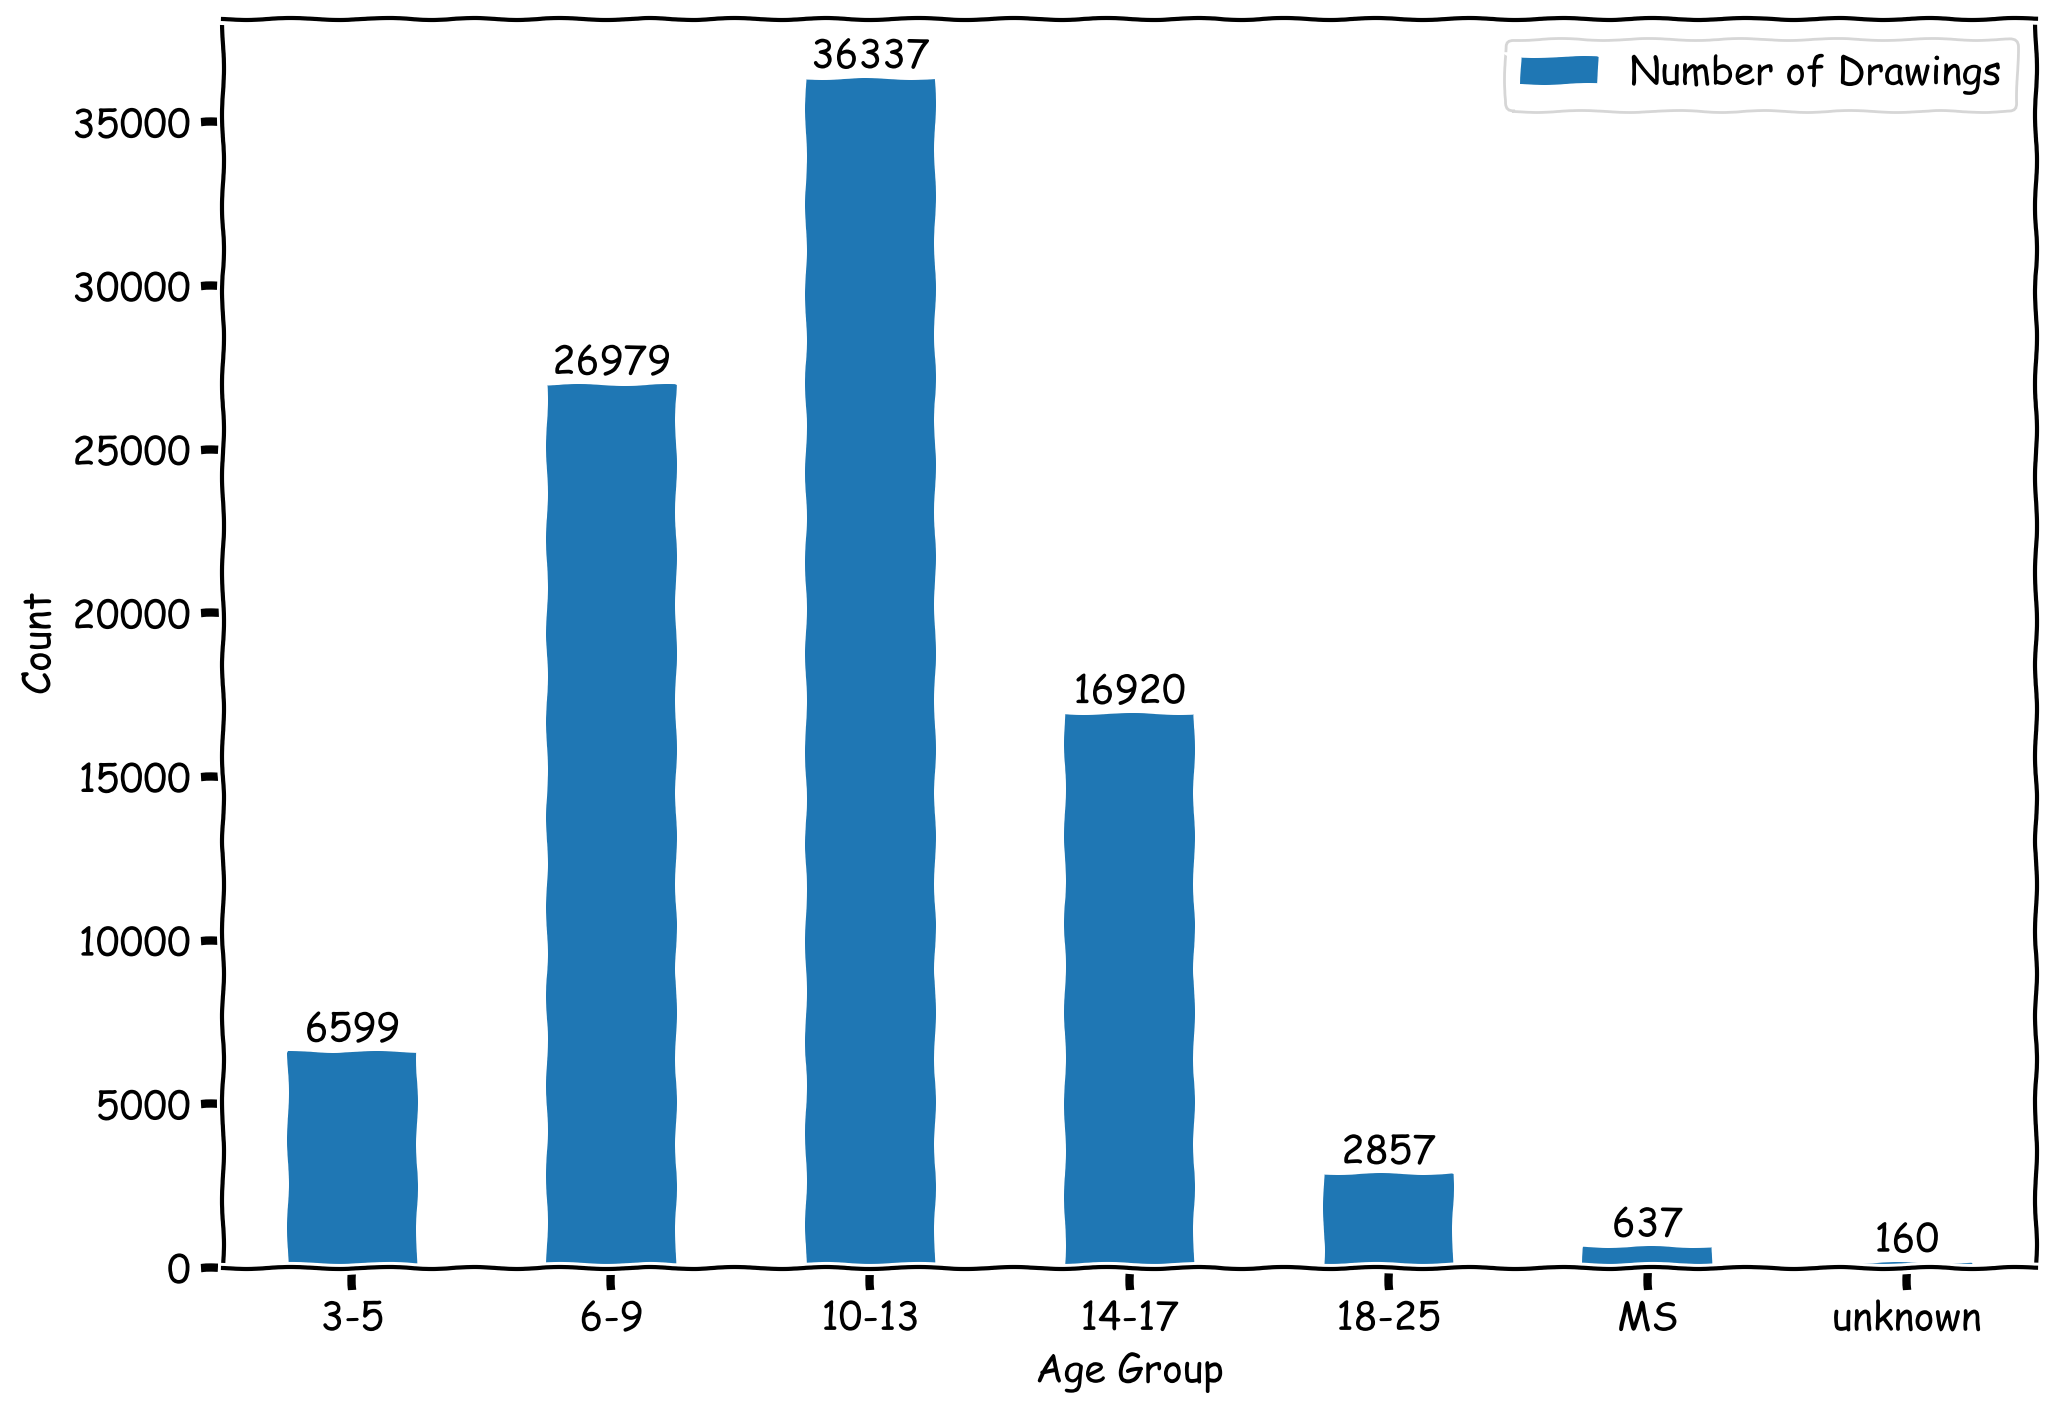

In [27]:
with plt.xkcd():
    # sns.set(style="ticks", context="talk")
    # plt.style.use("dark_background")
    # sns.set_theme()
    fig, ax = plt.subplots(dpi=200)
    # the size of A4 paper
    fig.set_size_inches(11.7, 8.27)
    year_wise_gb = year_wise_df.groupby(['age_group']).size().rename_axis('Age Group').reset_index(name='Number of Drawings').set_index('Age Group').loc[['3-5', '6-9', '10-13', '14-17', '18-25', 'MS', 'unknown']].reset_index(False) 
    year_wise_gb.plot.bar(x='Age Group', y = "Number of Drawings", ylabel="Count", ax=ax)
    ax.bar_label(ax.containers[0])
    plt.xticks(rotation=0)

There are mainly 6 age categories, 3-5, 6-9, 10-13, 14-17, 18-25 and special medical categories.

The age groups are not uniform and there is some overlapping. The age groups that are not falling in the mentioned categories are normalized. The age entries in the medical categories are not normalized. Some entries in 1996 have age category as 3-25 and they do not have metadata stickers. Hence they are not updated.

## Years

In [6]:
year_age_distb = year_wise_df.groupby(['year', 'age_group']).size().unstack().fillna(0).astype(int)
year_age_distb = year_age_distb[['3-5', '6-9', '10-13', '14-17', '18-25', 'MS', 'unknown']]
year_age_distb.loc['Year Total']= year_age_distb.sum(numeric_only=True, axis=0)
year_age_distb.loc[:,'Category Total'] = year_age_distb.sum(numeric_only=True, axis=1)

year_age_distb

age_group,3-5,6-9,10-13,14-17,18-25,MS,unknown,Category Total
year,,,,,,,,
1994,2,99,711,340,27,45,0,1224
1995,139,1507,2064,1190,211,78,0,5189
1996,253,1207,1227,615,111,59,141,3613
1997,172,767,754,438,111,40,3,2285
1998,258,923,1106,731,253,2,1,3274
1999,264,839,1395,517,139,29,0,3183
2000,347,1968,3335,1716,234,88,0,7688
2001,418,1284,1868,885,142,19,1,4617
2002,329,1458,1745,538,89,43,0,4202


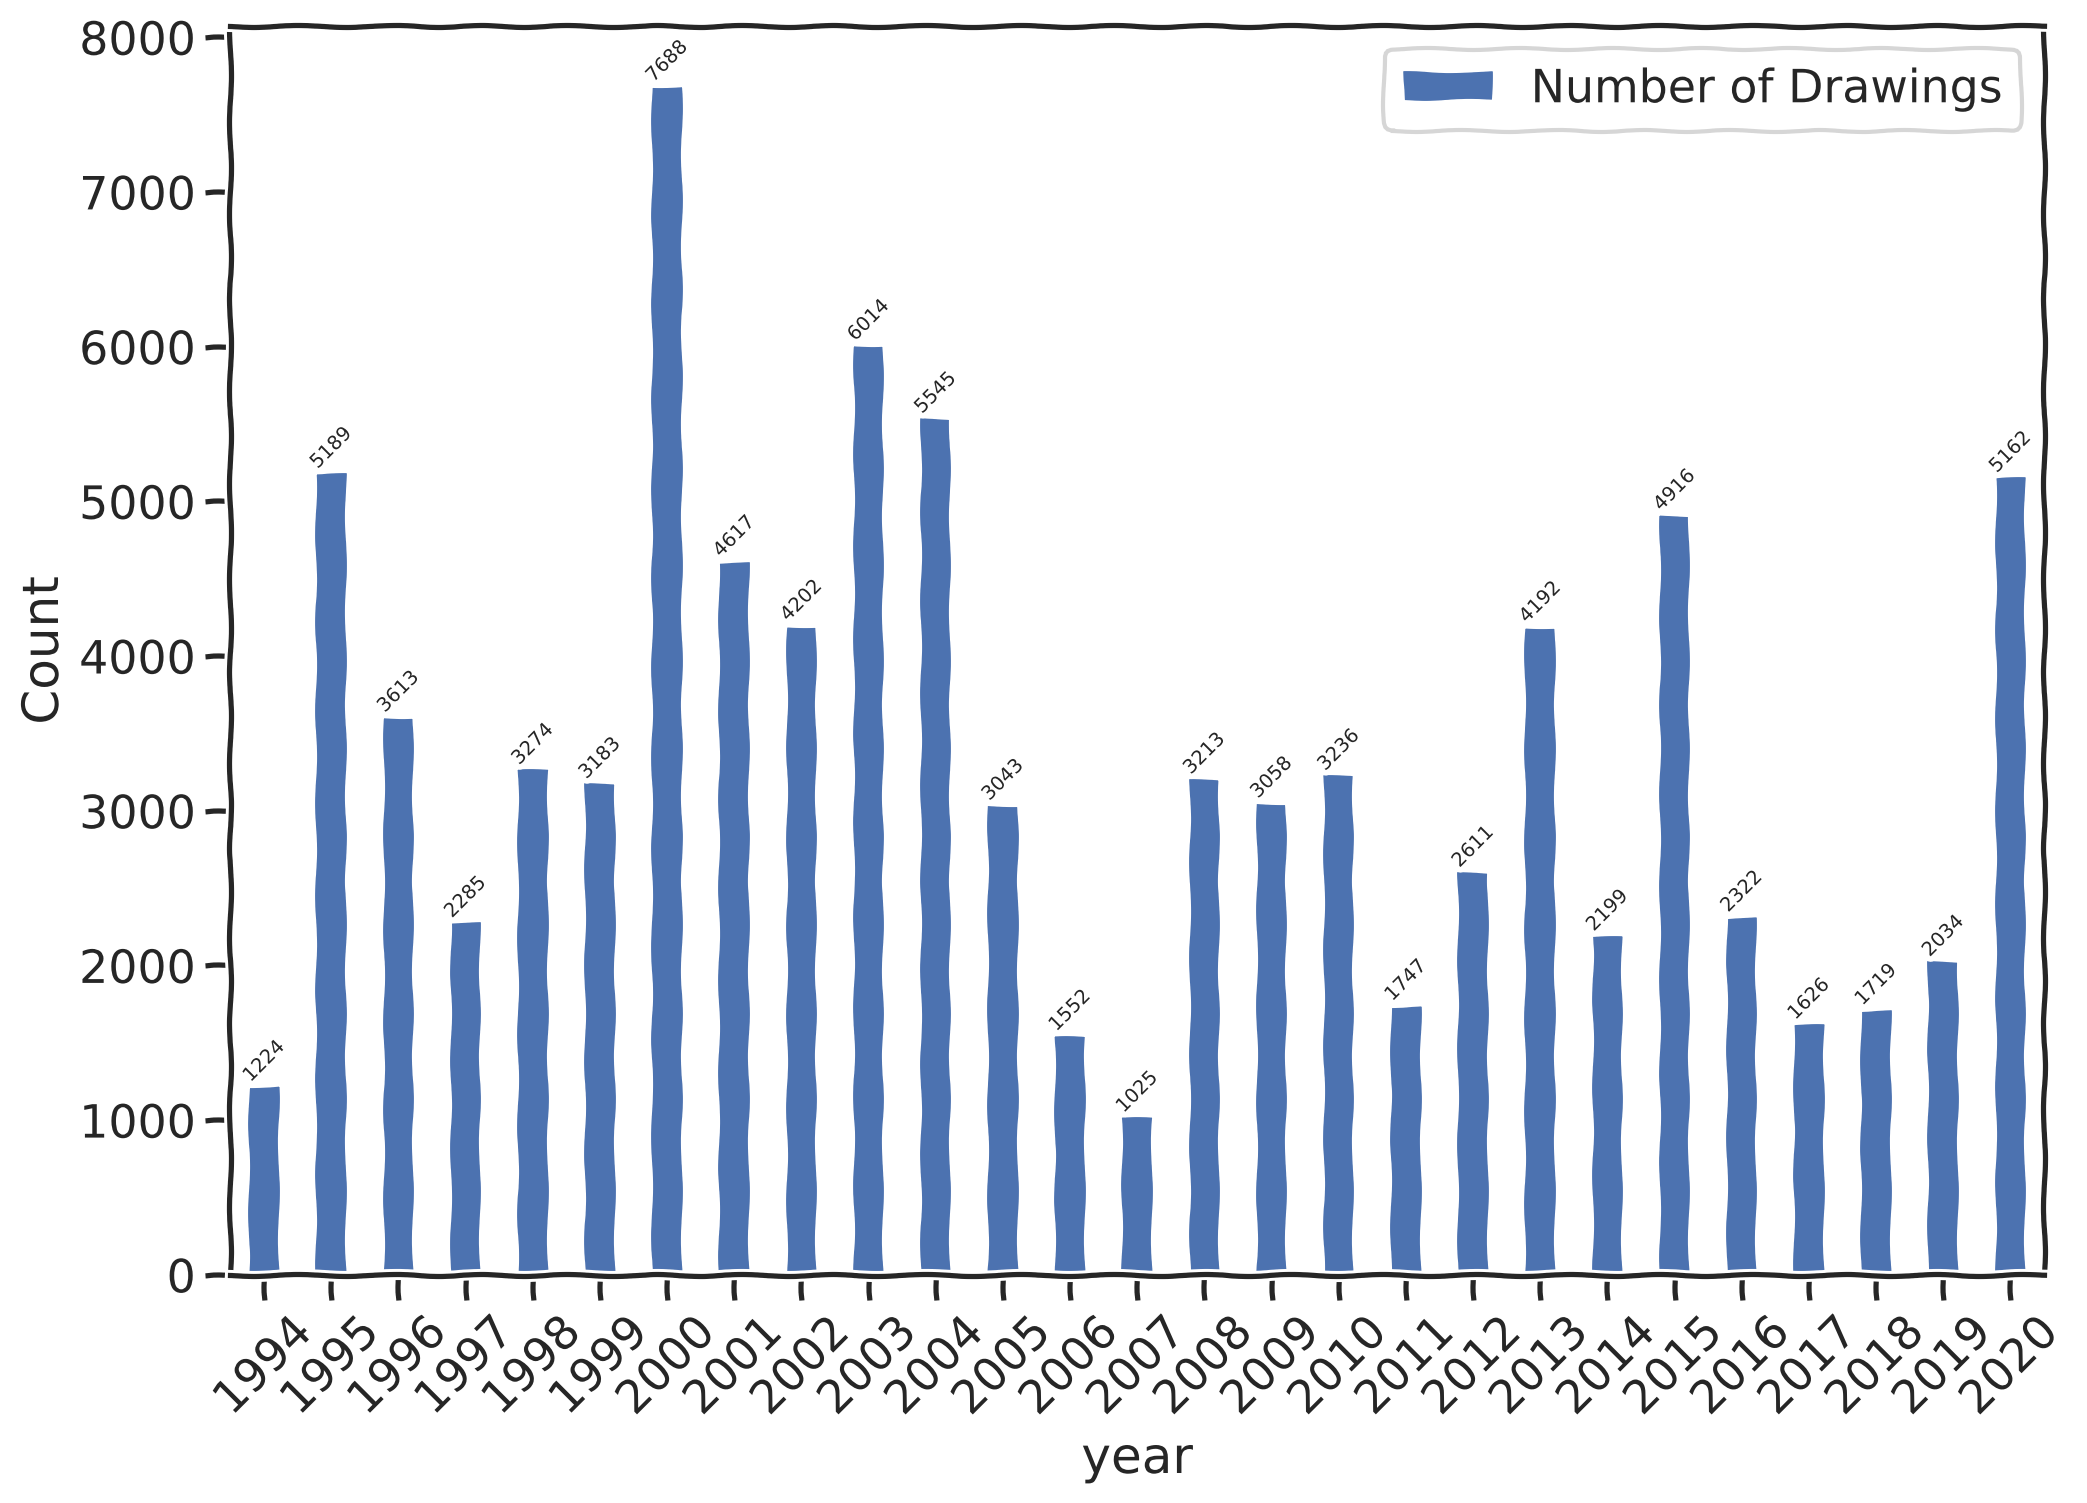

In [25]:
with plt.xkcd():
    sns.set(style="ticks", context="talk")
    # plt.style.use("dark_background")
    fig, ax = plt.subplots(dpi=200)
    # the size of A4 paper
    fig.set_size_inches(11.7, 8.27)
    year_wise_gb = year_wise_df.groupby(['year']).size().rename_axis('year').reset_index(name='Number of Drawings') 
    year_wise_gb.plot.bar(x='year', y = "Number of Drawings", ylabel="Count", ax=ax)
    ax.bar_label(ax.containers[0], rotation=45, size=7)
    plt.xticks(rotation=45)

`drawings_per_year` is the dictionary with key as year and values in a list with absolute address of the drawings within the Train folder for that year. This dictionary will be stored as a JSON and can be used to extract drawings for a selected year.

In [ ]:
with open('./../../data/intermediate_storage/drawings_per_year.json', 'w') as json_out_file:
    json.dump(drawings_per_year, json_out_file, indent=4)

## Country distribution

In [18]:
country_counts = year_wise_df["country"].value_counts().rename_axis('country_code').reset_index(name='Drawings')
country_counts

,country_code,Drawings
0,FRA,9120
1,LVA,5194
2,POL,4883
3,LKA,4660
4,UKR,3848
...,...,...
166,FRO,1
167,YOG,1
168,GAM,1
169,KHA,1


In [19]:
fig = px.choropleth(country_counts, locations="country_code",
                    locationmode='ISO-3',
                    color="Drawings", 
                    color_continuous_scale="SunsetDark")

fig.write_html('country_wise_drawings.html', auto_open=True)

#### Version 1
![country_wise_drawings_v1.png](./country_wise_drawings_v1.png)

#### Version 2

![country_wise_drawings_v2.png](./country_wise_drawings_v2.png)

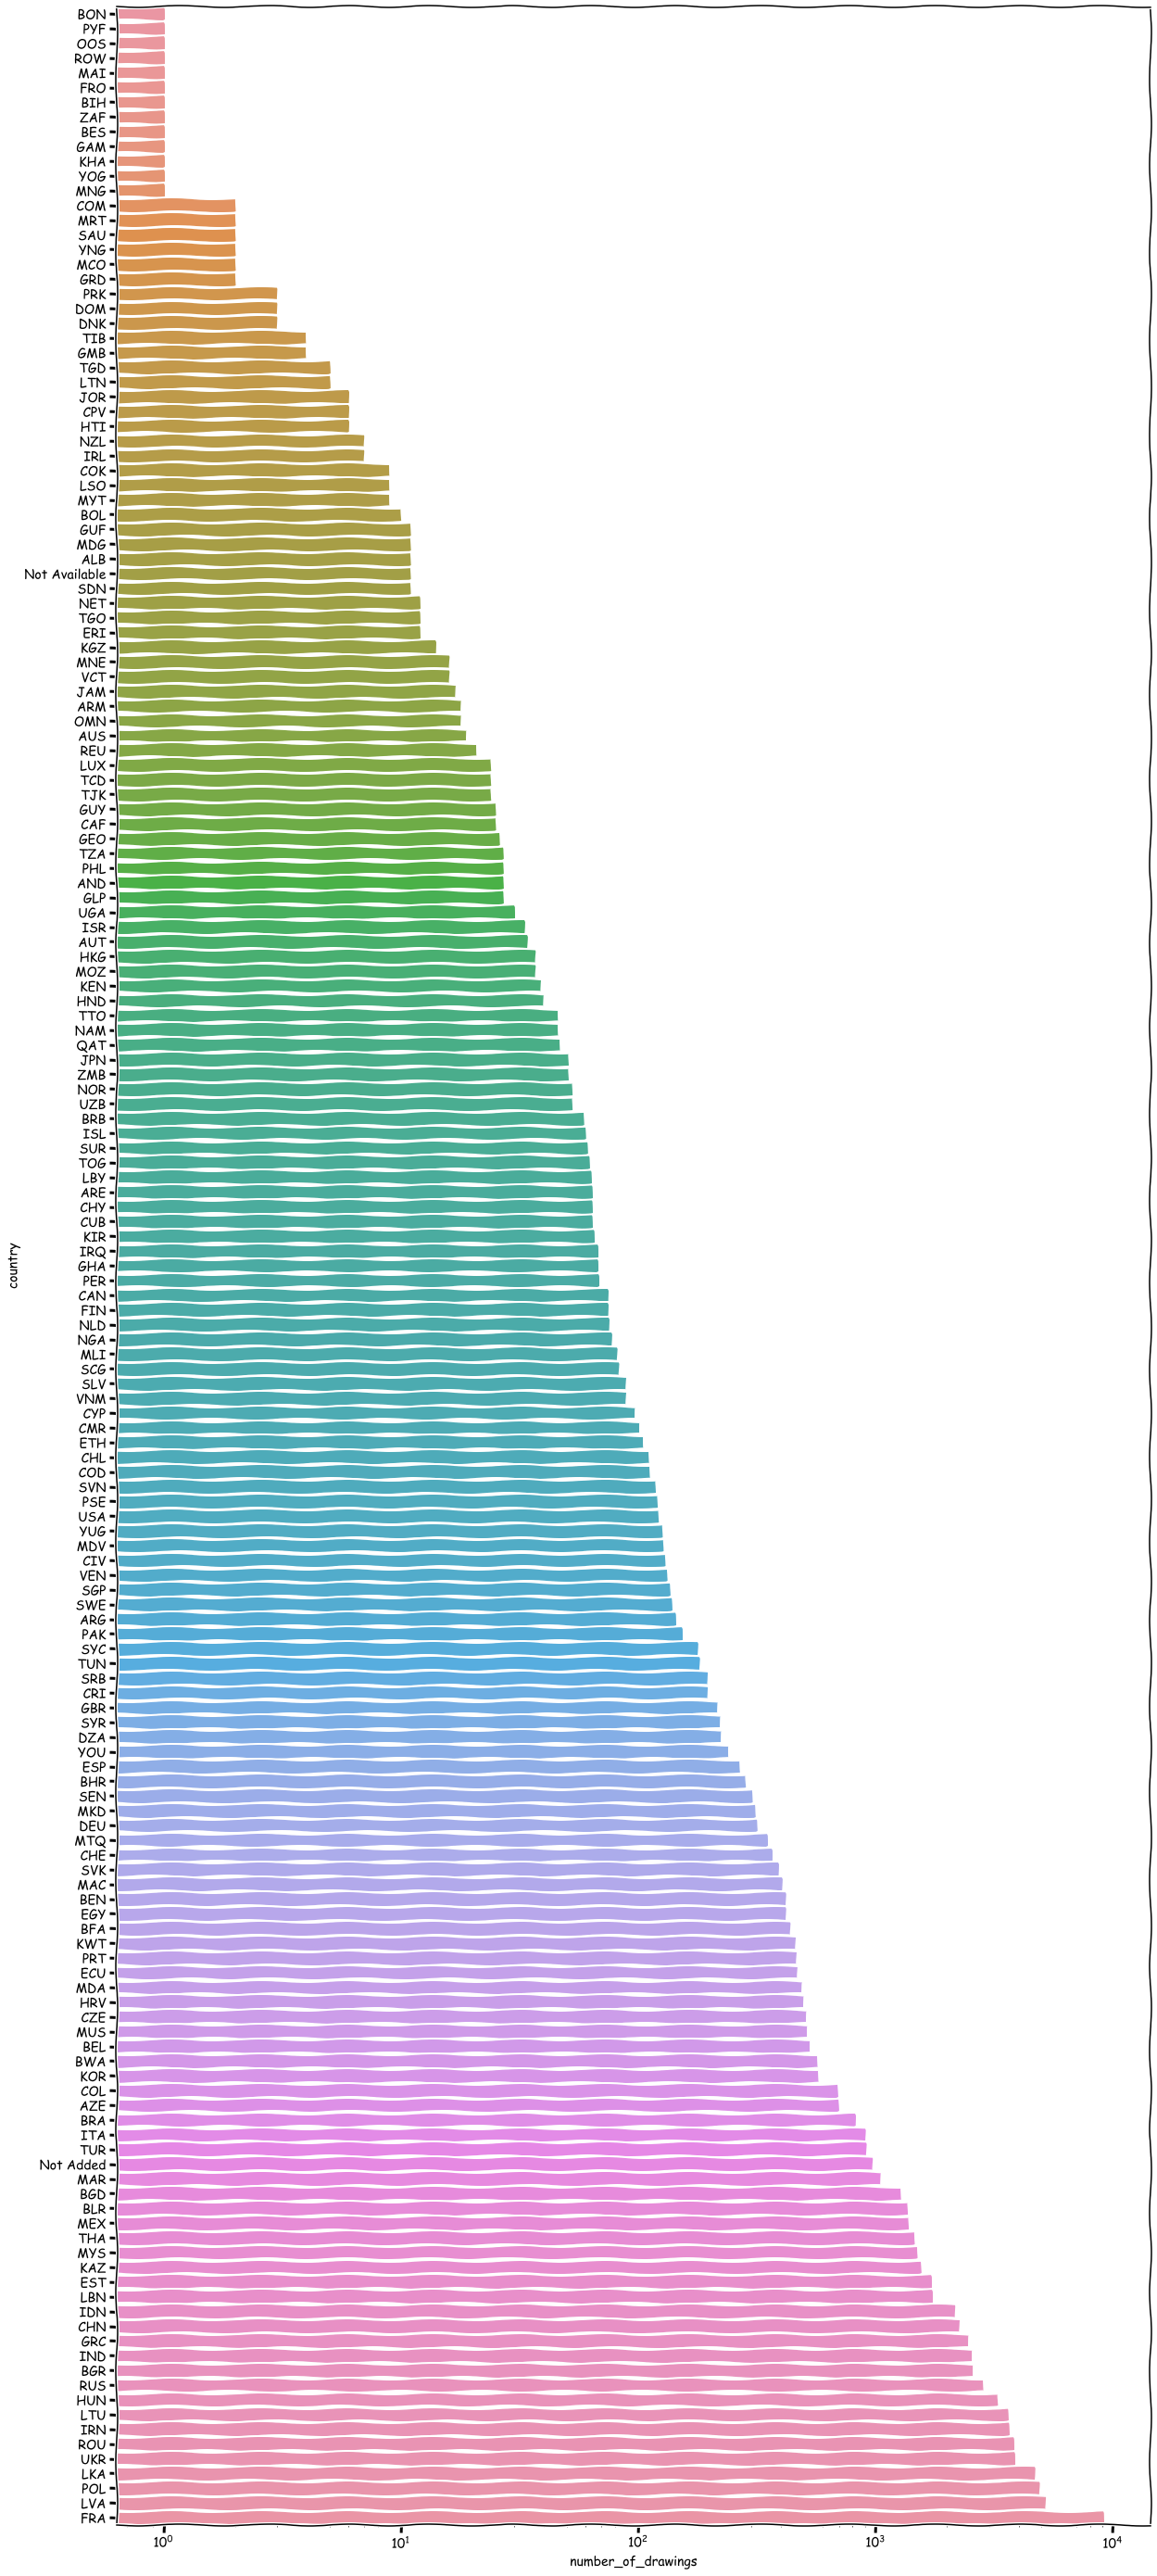

In [17]:
with plt.xkcd():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(20, 50)
    country_wise_df = year_wise_df.groupby(["country"]).agg(number_of_drawings=("id", 'count')).reset_index().sort_values(by=["number_of_drawings"])

    # plot barplot
    sns.barplot(y="country",
               x="number_of_drawings",
               data=country_wise_df, 
               log=True)